##                          Merry Christmas sibs! 

#### As I may or may not have told you both, I plan on looking for a new job this spring and have been working on some personal projects to strengthen my resume when I eventually start looking. Since I'm into data analysis, I thought it'd be a fun project and solid supplmental Christmas gift to analyze our Neflix data!

#### Is this an invasion of your viewing habits? **Yes**. Will I uncover some wonder but perhaps embarrasing things? **Yes**. Will I focus mostly on The Office episodes we've all watched because it gives me a trove of useable GIFs and because it will be removed from Netflix in 2021? **Absolute and Definitive Yes**.

#### Some of this stuff requires I show the code in order to see the actual results. I'll try and not get too in-the-weeds

<div style="width:100%;height:0;padding-bottom:56%;position:relative;"><iframe src="https://giphy.com/embed/5wWf7H89PisM6An8UAU" width="100%" height="100%" style="position:absolute" frameBorder="0" class="giphy-embed" allowFullScreen></iframe></div><p><a href="https://giphy.com/gifs/editingandlayout-the-office-michael-scott-5wWf7H89PisM6An8UAU">via GIPHY</a></p>

#### Alright, let's get to it.

#### First I'm just importing some libraries and actual data. Let take a look how much viewing data Netflix was able to give me:

In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
netflix = pd.read_csv('C:/Users/U385722/Desktop/ViewingActivity.csv')
netflix.shape

(27082, 10)

#### 27K rows and 10 columns of viewing data. Oh, this is going to be fun. Here's a snippet of what the variables look like:

In [3]:
netflix.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Anil,2020-11-25 07:04:44,00:00:14,NaN,The Office (U.S.): Season 3: Business School (...,NaN,Apple iPad mini,00:00:14,00:00:14,US (United States)
1,Anil,2020-11-25 01:26:38,00:00:01,Autoplayed: user action: None;,Screwed,NaN,Samsung 2015 NT14M DTV Smart TV,00:00:01,00:00:01,US (United States)
2,Anil,2020-11-25 01:21:20,00:01:45,Autoplayed: user action: None;,Gilmore Girls: Season 5: Emily Says 'Hello' (E...,NaN,Samsung 2015 NT14M DTV Smart TV,00:01:45,00:01:45,US (United States)
3,Anil,2020-11-25 00:39:46,00:37:31,Autoplayed: user action: Unspecified;,Gilmore Girls: Season 5: The Party's Over (Epi...,NaN,Samsung 2015 NT14M DTV Smart TV,00:43:16,00:43:16,US (United States)
4,Anil,2020-11-25 00:39:12,00:00:10,NaN,Survivor: Season 28: Cagayan: Hot Girl With a ...,NaN,Samsung 2015 NT14M DTV Smart TV,00:00:10,00:00:10,US (United States)


#### Seems like most of the countries are USA, which makes sense. Did any of us do any international watching?

In [4]:
netflix.Country.unique()

array(['US (United States)', 'CA (Canada)'], dtype=object)

#### Canada...of course. Sidenote, we need to travel more after COVID y'all. 

In [5]:
netflix[netflix.Country == "CA (Canada)"]

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
8229,Arzu,2019-07-10 12:46:52,00:33:35,NaN,Aziz Ansari: RIGHT NOW,NaN,Apple iPhone X (CDMA),00:32:24,Not latest view,CA (Canada)
13089,Arzu,2017-06-28 22:02:31,00:53:27,NaN,House of Cards: Season 5: Chapter 65 (Episode 13),NaN,Apple iPhone 6,00:53:28,00:53:28,CA (Canada)


#### Interestingly, only two instances. Zoo catching some Aziz Ansari standup on her iPhone two summers ago and Zoo watching House Of Cards back in the summer of 2017. That show really did not age well

<div style="width:100%;height:0;padding-bottom:83%;position:relative;"><iframe src="https://giphy.com/embed/k7LbHJIqXobSJIKXV2" width="100%" height="100%" style="position:absolute" frameBorder="0" class="giphy-embed" allowFullScreen></iframe></div><p><a href="https://giphy.com/gifs/theoffice-the-office-tv-boys-and-girls-k7LbHJIqXobSJIKXV2">via GIPHY</a></p>

In [6]:
netflix['Device Type'].unique()
netflix['Supplemental Video Type'].unique()
netflix.Attributes.unique()

array([nan, 'Autoplayed: user action: None; ',
       'Autoplayed: user action: Unspecified; ',
       'Autoplayed: user action: User_Interaction; '], dtype=object)

In [7]:
netflix = netflix.drop(['Attributes', 'Supplemental Video Type','Bookmark','Latest Bookmark', 'Country'], axis=1)
#axis=1 tells pandas to drop columns

In [8]:
netflix.dtypes
#ryan used me as an object

Profile Name    object
Start Time      object
Duration        object
Title           object
Device Type     object
dtype: object

In [9]:
#converting start time to date time format for UTC
netflix['Start Time'] = pd.to_datetime(netflix['Start Time'], utc=True)
netflix.dtypes

Profile Name                 object
Start Time      datetime64[ns, UTC]
Duration                     object
Title                        object
Device Type                  object
dtype: object

In [10]:
#setting start time to index
netflix = netflix.set_index('Start Time')

In [11]:
#convert UTC to US Cenral Time
netflix.index = netflix.index.tz_convert('US/Central')

In [12]:
#reset index so that start time goes back to a column
netflix = netflix.reset_index()
netflix.head()

,Start Time,Profile Name,Duration,Title,Device Type
0,2020-11-25 01:04:44-06:00,Anil,00:00:14,The Office (U.S.): Season 3: Business School (...,Apple iPad mini
1,2020-11-24 19:26:38-06:00,Anil,00:00:01,Screwed,Samsung 2015 NT14M DTV Smart TV
2,2020-11-24 19:21:20-06:00,Anil,00:01:45,Gilmore Girls: Season 5: Emily Says 'Hello' (E...,Samsung 2015 NT14M DTV Smart TV
3,2020-11-24 18:39:46-06:00,Anil,00:37:31,Gilmore Girls: Season 5: The Party's Over (Epi...,Samsung 2015 NT14M DTV Smart TV
4,2020-11-24 18:39:12-06:00,Anil,00:00:10,Survivor: Season 28: Cagayan: Hot Girl With a ...,Samsung 2015 NT14M DTV Smart TV


In [13]:
netflix['Duration'] = pd.to_timedelta(netflix['Duration'])
netflix.dtypes

Start Time      datetime64[ns, US/Central]
Profile Name                        object
Duration                   timedelta64[ns]
Title                               object
Device Type                         object
dtype: object

In [14]:
#filter down to a new dataframe called office using string contains
office = netflix[netflix['Title'].str.contains('The Office (U.S.)', regex=False)]
office.head()
office.shape

(8518, 5)

In [15]:
#remove any 'preview' rows by filtering duration
office = office[(office['Duration']> '0 days 00:01:00')]
office.shape

(7586, 5)

In [16]:
7586/27082
#Office episodes make up almost 30% of the watches (rows)

0.2801122516800827

In [17]:
office['Duration'].sum()

Timedelta('103 days 08:38:14')

In [18]:
office_dil = office[(office['Profile Name'] == 'Adil')]
office_nil = office[(office['Profile Name'] == 'Anil')]
office_arzu = office[(office['Profile Name'] == 'Arzu')]

In [19]:
office_nil['Duration'].sum()

Timedelta('47 days 20:22:32')

In [20]:
print(f"Anil watched The Office for a total of {[office_nil['Duration'].sum()]}")
print(f"Adil watched The Office for a total of {[office_dil['Duration'].sum()]}")
print(f"Arzu watched The Office for a total of {[office_arzu['Duration'].sum()]}")

Anil watched The Office for a total of [Timedelta('47 days 20:22:32')]
Adil watched The Office for a total of [Timedelta('49 days 03:18:13')]
Arzu watched The Office for a total of [Timedelta('6 days 08:55:12')]


In [21]:
#creating columns for weekday & hour variables
office['weekday'] = office['Start Time'].dt.weekday
office['hour'] = office['Start Time'].dt.hour

office.head()

,Start Time,Profile Name,Duration,Title,Device Type,weekday,hour
21,2020-11-21 05:08:52-06:00,Anil,00:20:47,The Office (U.S.): Season 3: Phyllis's Wedding...,Samsung 2015 NT14M DTV Smart TV,5,5
22,2020-11-21 04:47:56-06:00,Anil,00:20:47,The Office (U.S.): Season 3: Ben Franklin (Epi...,Samsung 2015 NT14M DTV Smart TV,5,4
23,2020-11-21 04:29:17-06:00,Anil,00:18:23,The Office (U.S.): Season 3: The Return (Episo...,Samsung 2015 NT14M DTV Smart TV,5,4
38,2020-11-19 01:59:21-06:00,Adil,00:07:08,The Office (U.S.): Season 2: The Fire (Episode 4),Google Chromecast V5 Streaming Stick,3,1
39,2020-11-19 01:38:13-06:00,Adil,00:21:02,The Office (U.S.): Season 2: Office Olympics (...,Google Chromecast V5 Streaming Stick,3,1


In [22]:
#set column to categorical & ensure they are plotted in order
office['weekday'] = pd.Categorical(office['weekday'], categories=[0,1,2,3,4,5,6], ordered=True)

office_by_day = office['weekday'].value_counts()

office_by_day.head()

2    1240
0    1239
6    1151
1    1063
5    1011
Name: weekday, dtype: int64

In [23]:
#sort by index using the categorical
office_by_day = office_by_day.sort_index()
office_by_day.head()

0    1239
1    1063
2    1240
3    1007
4     875
Name: weekday, dtype: int64

In [24]:
#updating font size in matplotlib

plt.rcParams.update({'font.size': 22})

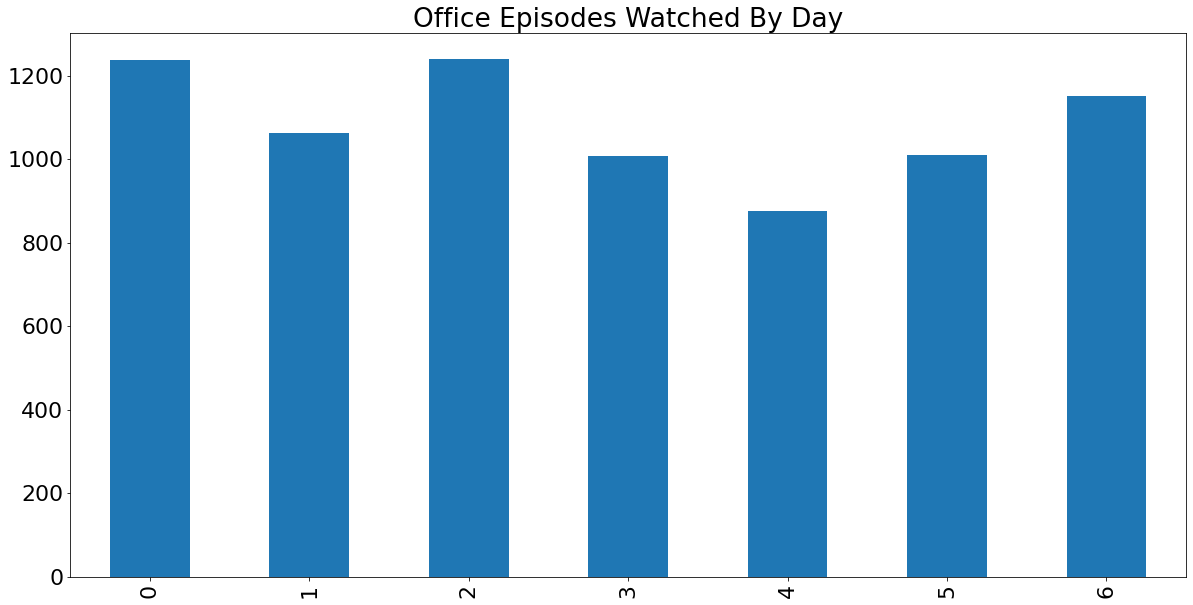

In [25]:
office_by_day.plot(kind='bar',figsize=(20,10), title='Office Episodes Watched By Day')

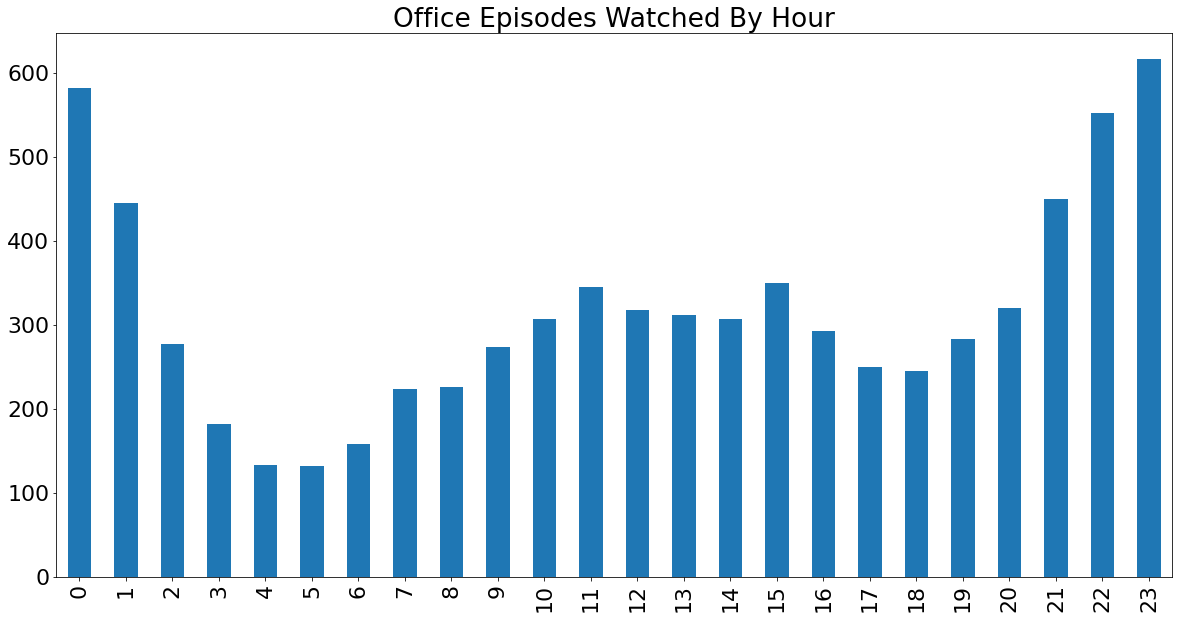

In [26]:
office['hour'] = pd.Categorical(office['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)

office_by_hour = office['hour'].value_counts()

office_by_hour.head()

office_by_hour = office_by_hour.sort_index()

office_by_hour.plot(kind='bar',figsize=(20,10), title='Office Episodes Watched By Hour')

In [27]:
office_dil = office[(office['Profile Name'] == 'Adil')]
office_nil = office[(office['Profile Name'] == 'Anil')]
office_arzu = office[(office['Profile Name'] == 'Arzu')]

<ipython-input-28-dd70335ccfd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office_nil['hour'] = pd.Categorical(office_nil['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)


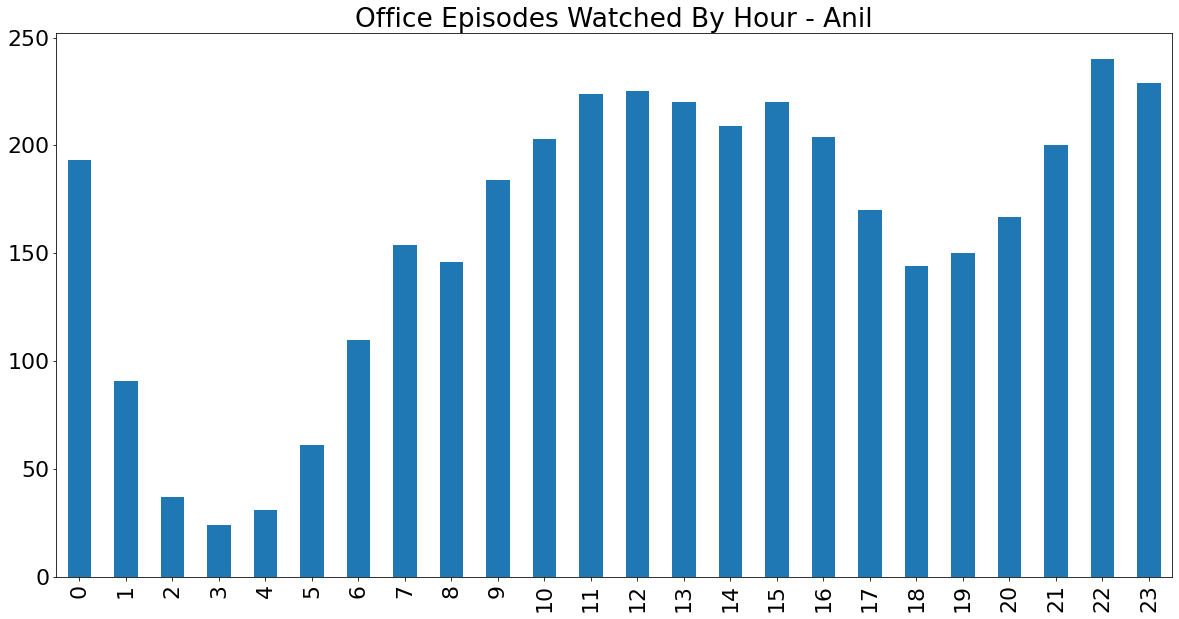

In [28]:
office_nil['hour'] = pd.Categorical(office_nil['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)

nil_by_hour = office_nil['hour'].value_counts()

nil_by_hour = nil_by_hour.sort_index()

nil_by_hour.plot(kind='bar',figsize=(20,10), title='Office Episodes Watched By Hour - Anil')

<ipython-input-29-8fad3c56dfe7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office_dil['hour'] = pd.Categorical(office_dil['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)


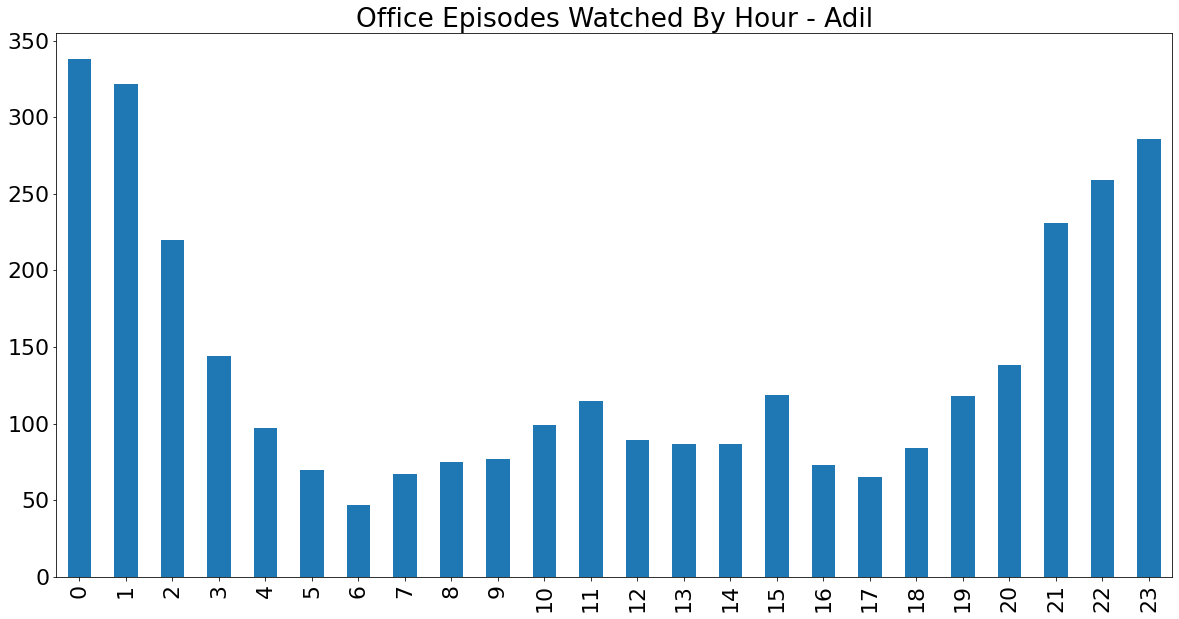

In [29]:
office_dil['hour'] = pd.Categorical(office_dil['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)

dil_by_hour = office_dil['hour'].value_counts()

dil_by_hour = dil_by_hour.sort_index()

dil_by_hour.plot(kind='bar',figsize=(20,10), title='Office Episodes Watched By Hour - Adil')

<ipython-input-30-329d7bdee8b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office_arzu['hour'] = pd.Categorical(office_arzu['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)


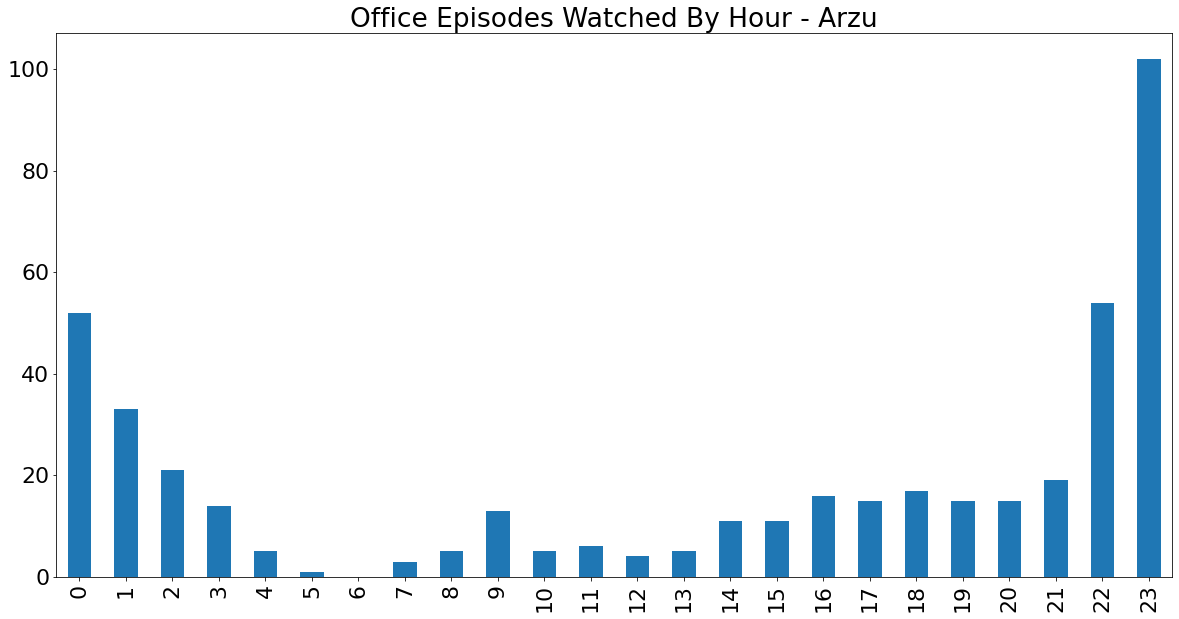

In [30]:
office_arzu['hour'] = pd.Categorical(office_arzu['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)

arzu_by_hour = office_arzu['hour'].value_counts()

arzu_by_hour = arzu_by_hour.sort_index()

arzu_by_hour.plot(kind='bar',figsize=(20,10), title='Office Episodes Watched By Hour - Arzu')

In [31]:
netflix['Title'].value_counts().head(15)

The Office (U.S.): Season 4: Dunder Mifflin Infinity (Episode 2)    114
The Office (U.S.): Season 4: Launch Party (Episode 3)                94
The Office (U.S.): Season 3: The Return (Episode 13)                 83
The Office (U.S.): Season 3: Traveling Salesmen (Episode 12)         83
The Office (U.S.): Season 4: Branch Wars (Episode 6)                 82
The Office (U.S.): Season 3: Beach Games (Episode 22)                81
The Office (U.S.): Season 3: A Benihana Christmas (Episode 10)       80
The Office (U.S.): Season 3: Women's Appreciation (Episode 21)       79
The Office (U.S.): Season 4: Money (Episode 4)                       79
The Office (U.S.): Season 2: Email Surveillance (Episode 9)          77
The Office (U.S.): Season 4: Local Ad (Episode 5)                    77
The Office (U.S.): Season 3: Product Recall (Episode 20)             76
The Office (U.S.): Season 5: Stress Relief: Part 2 (Episode 15)      76
The Office (U.S.): Season 2: Drug Testing (Episode 20)          

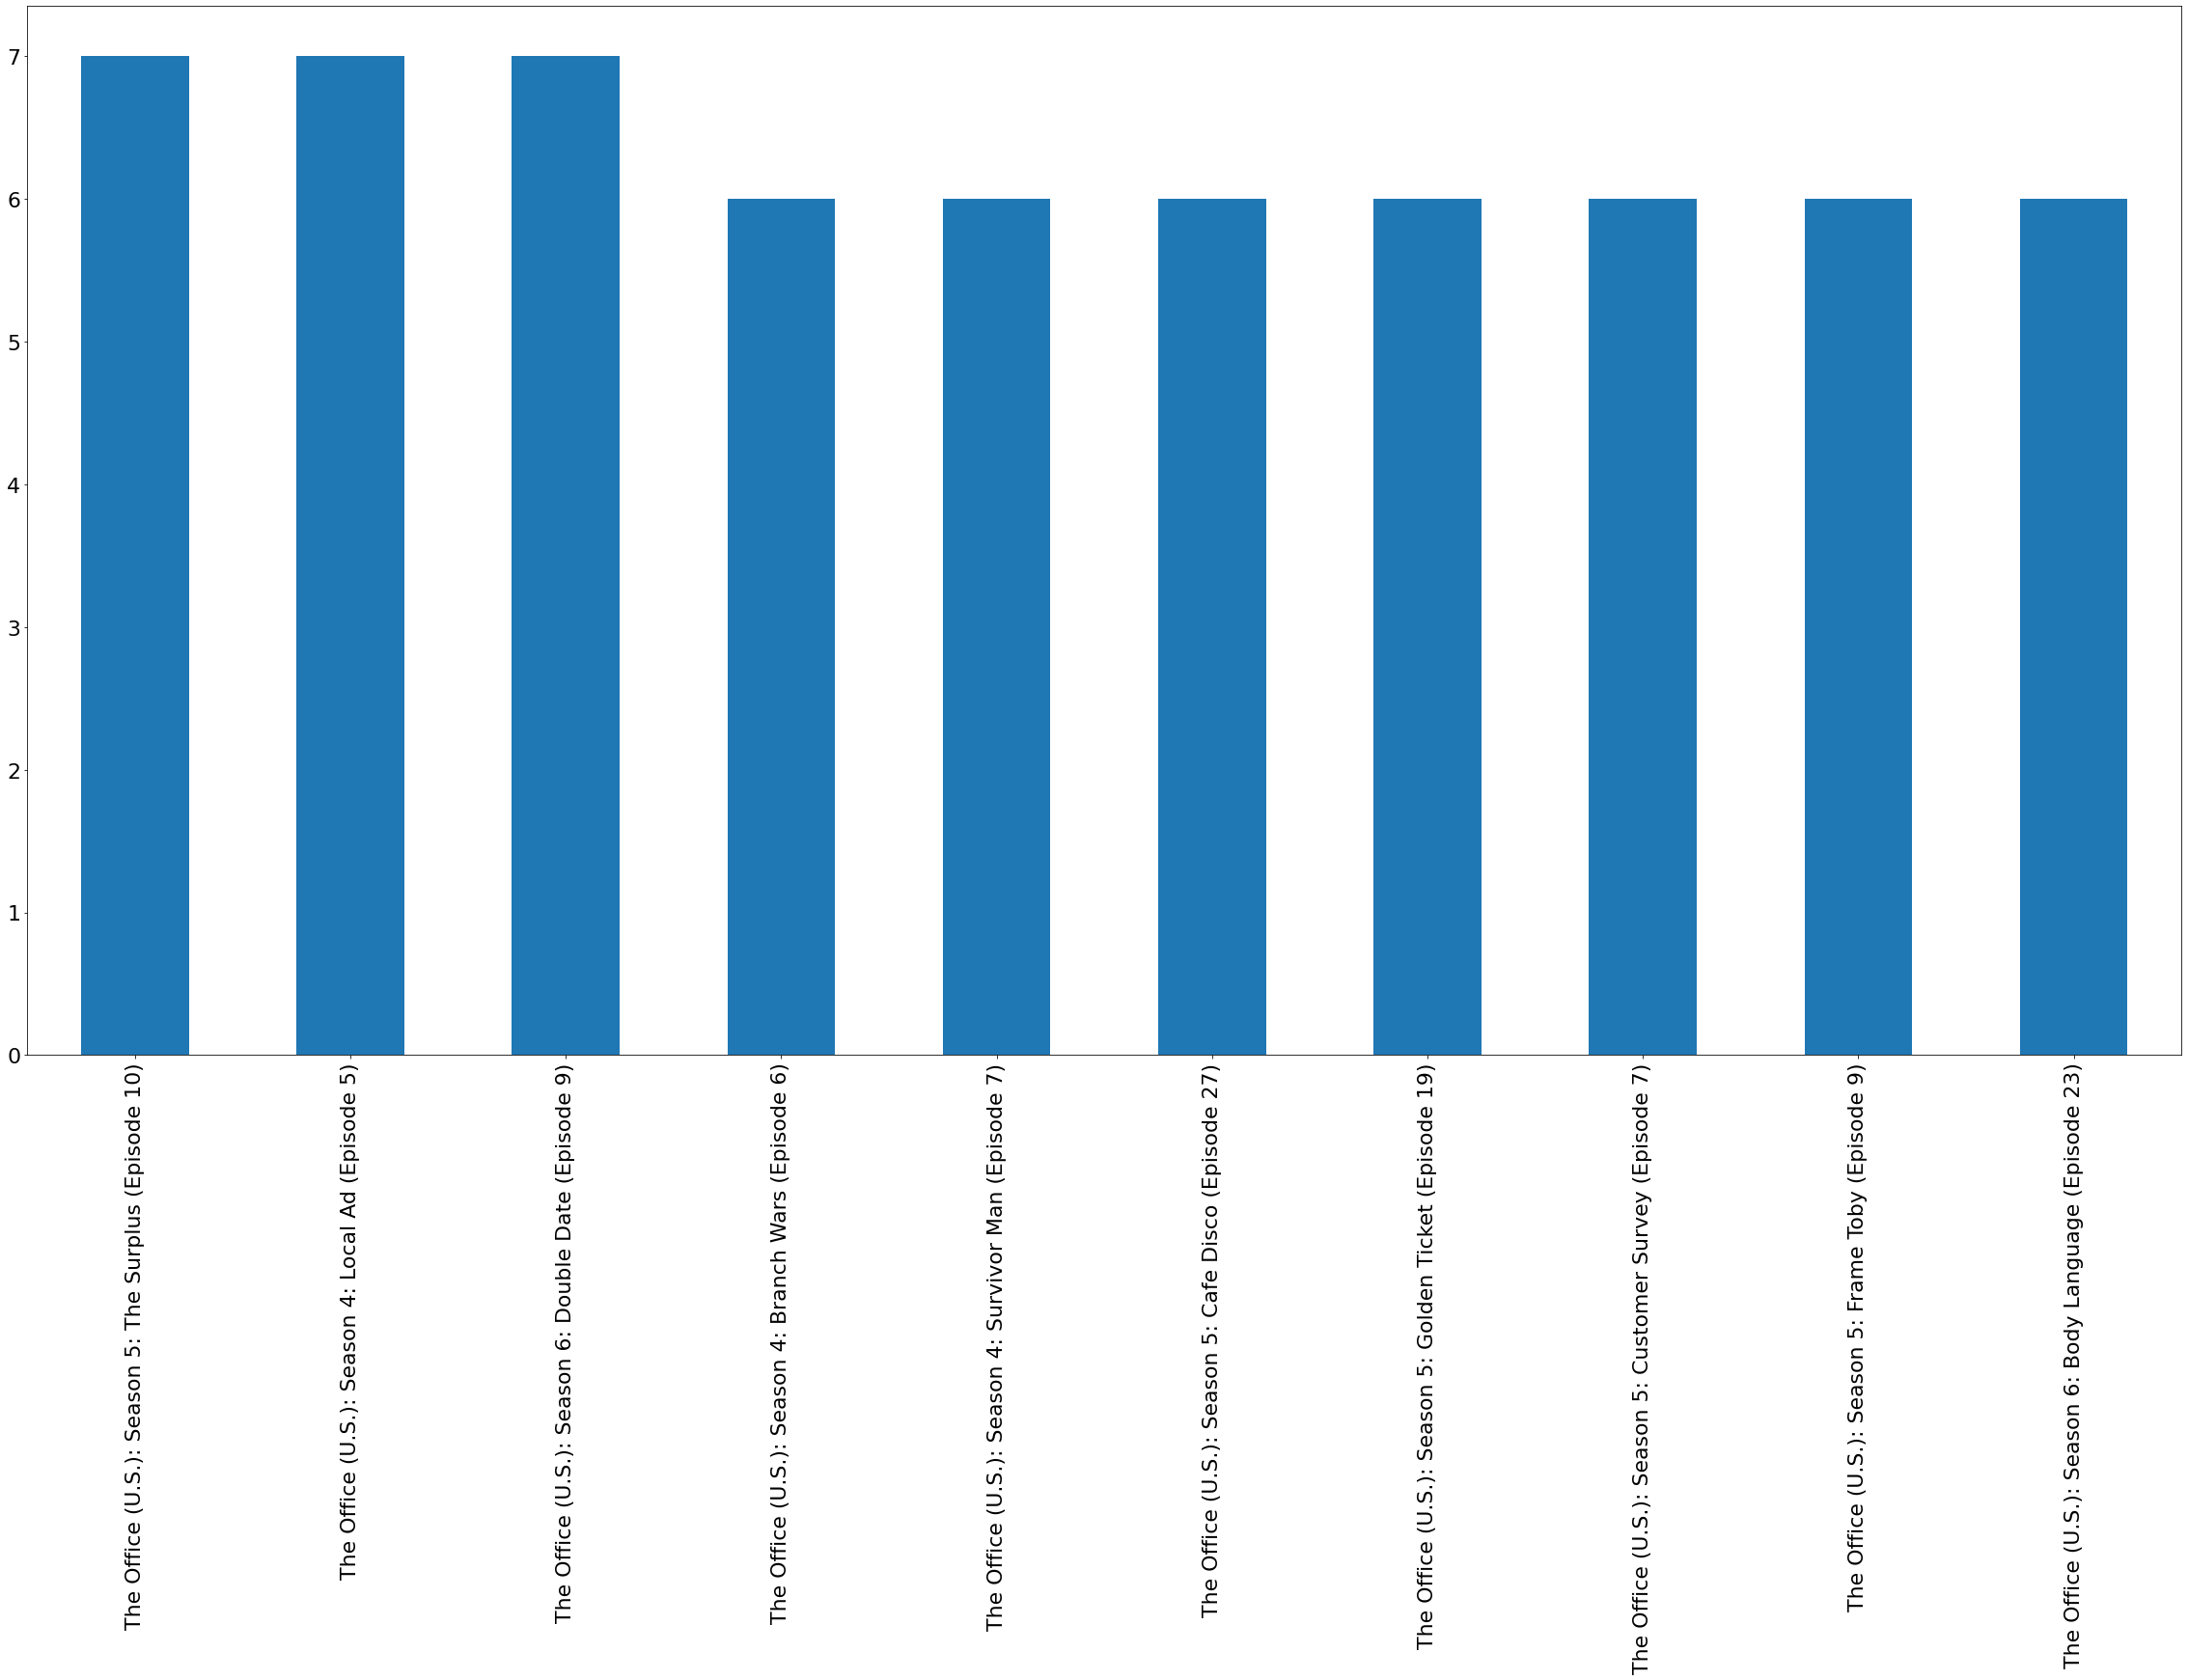

In [32]:
office_arzu['Title'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(40,20))

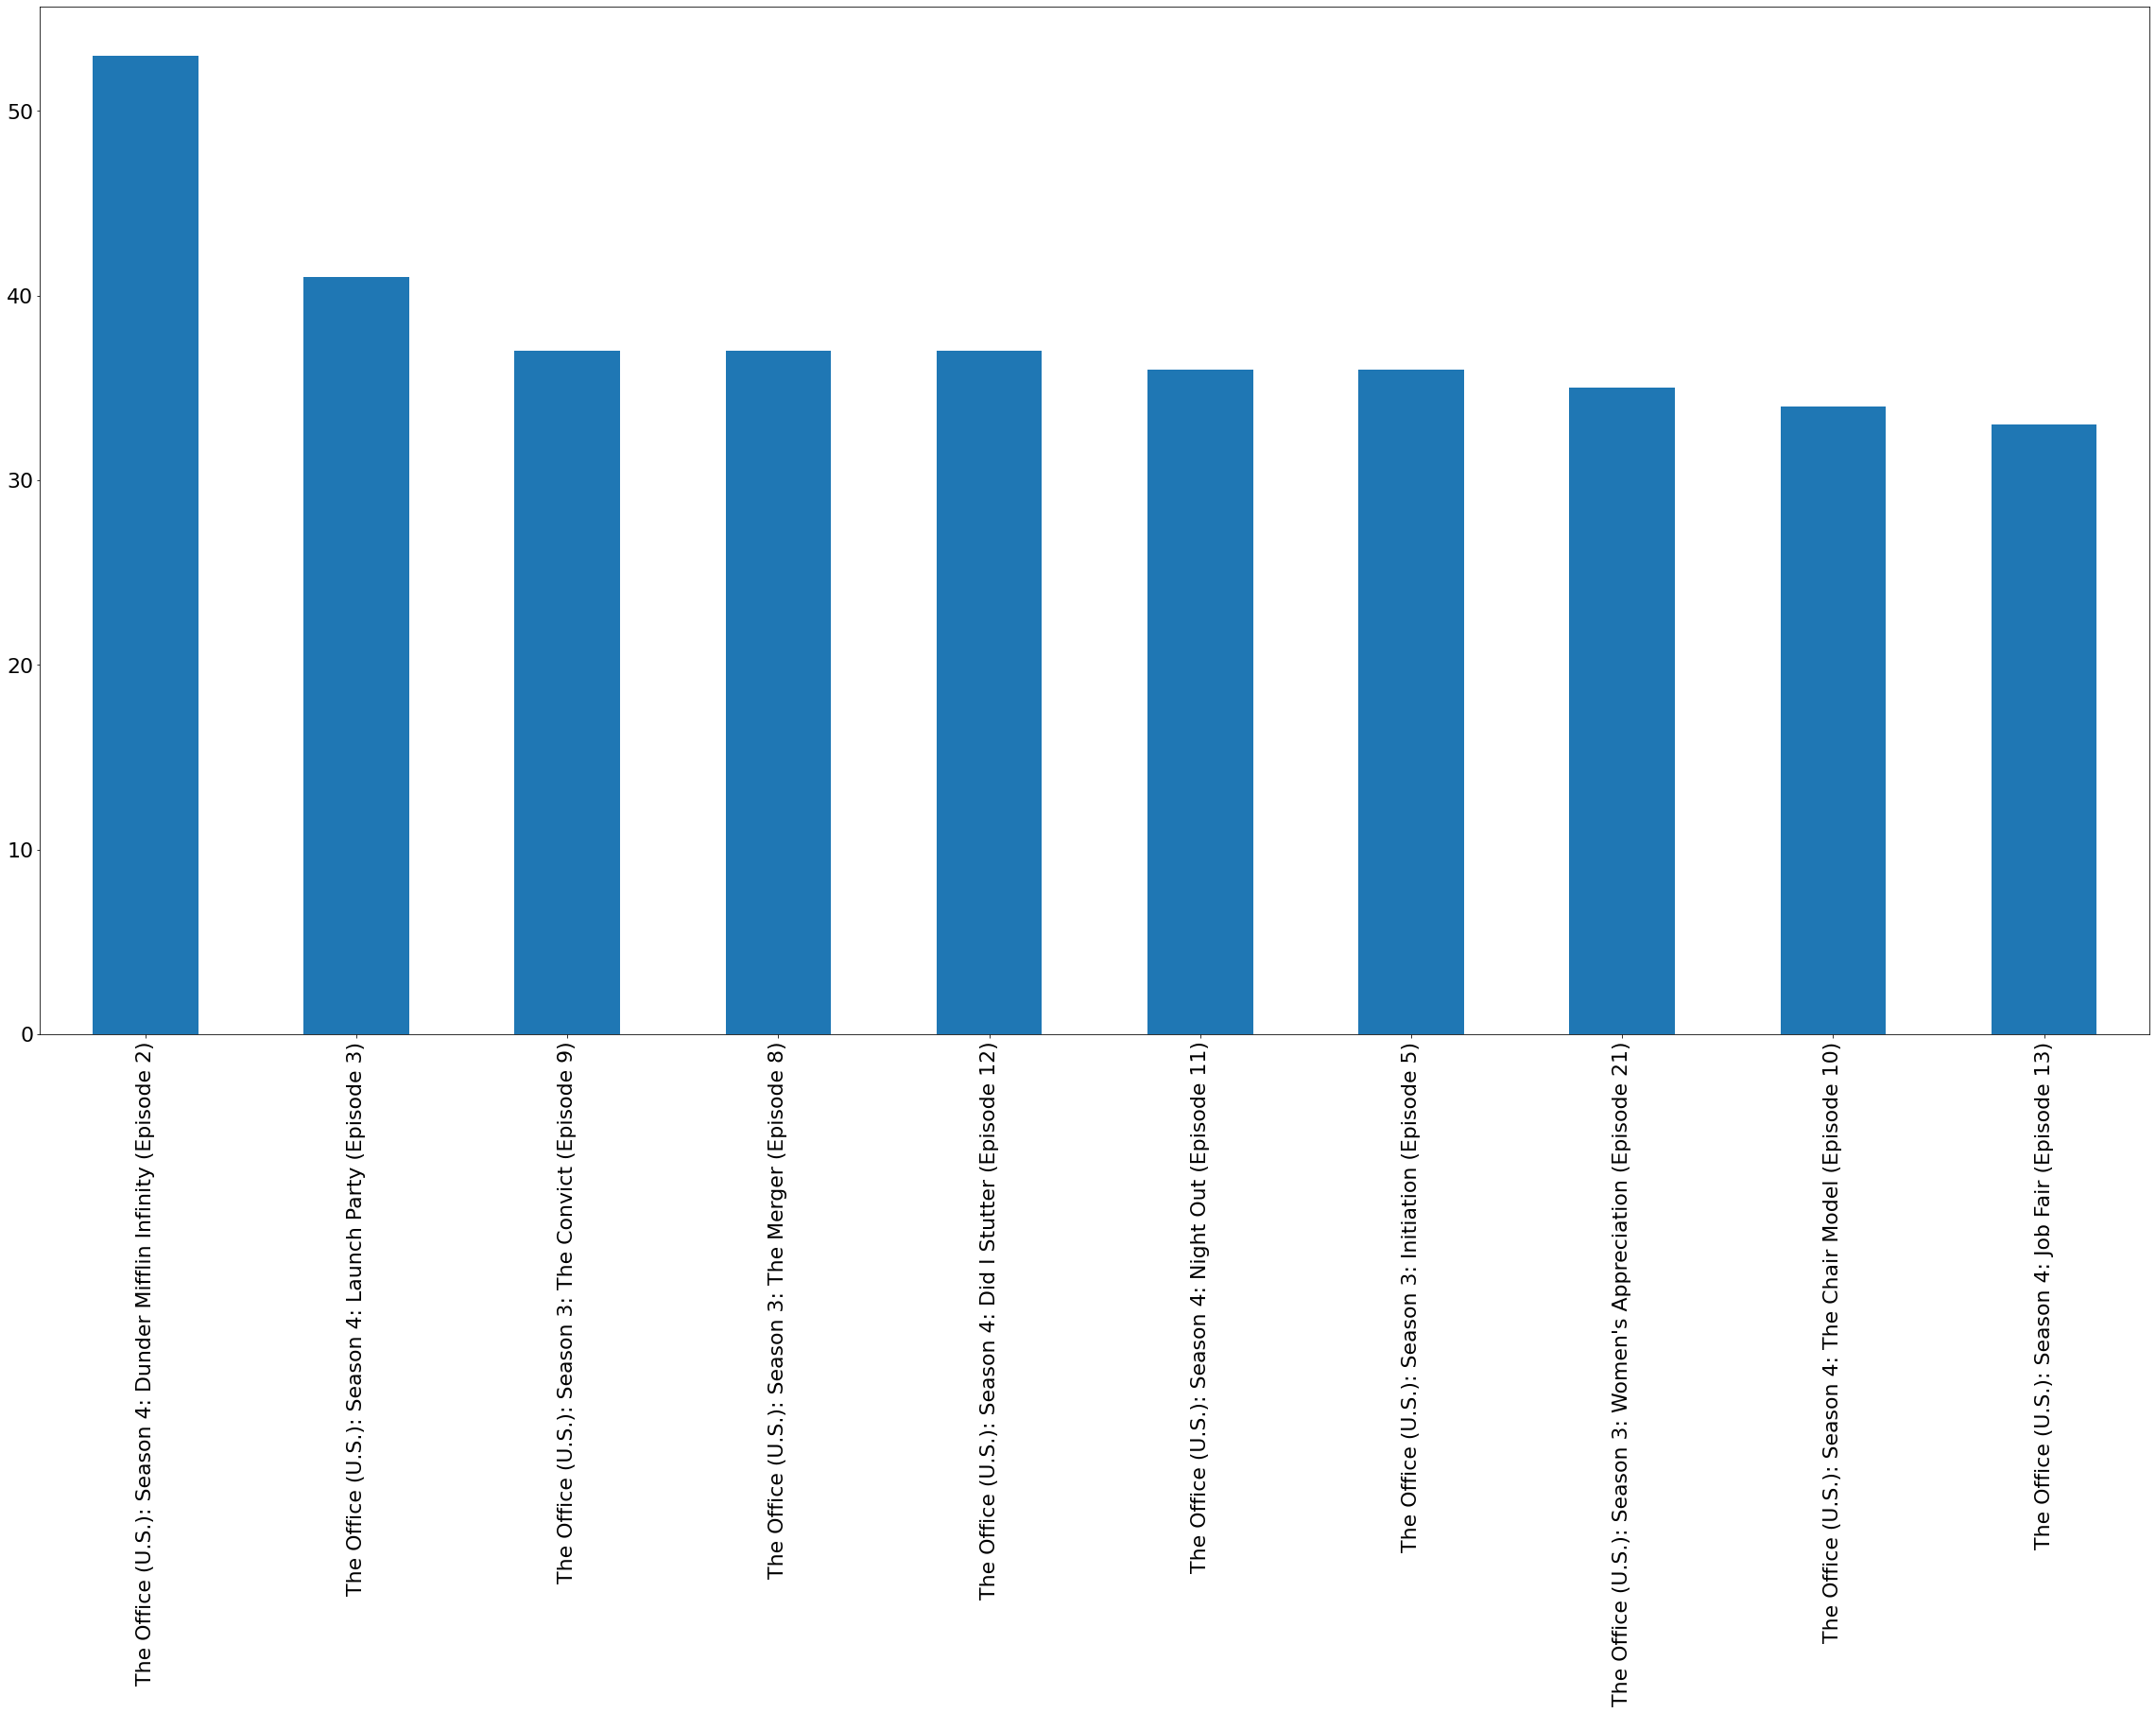

In [33]:
office_nil['Title'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(40,20))

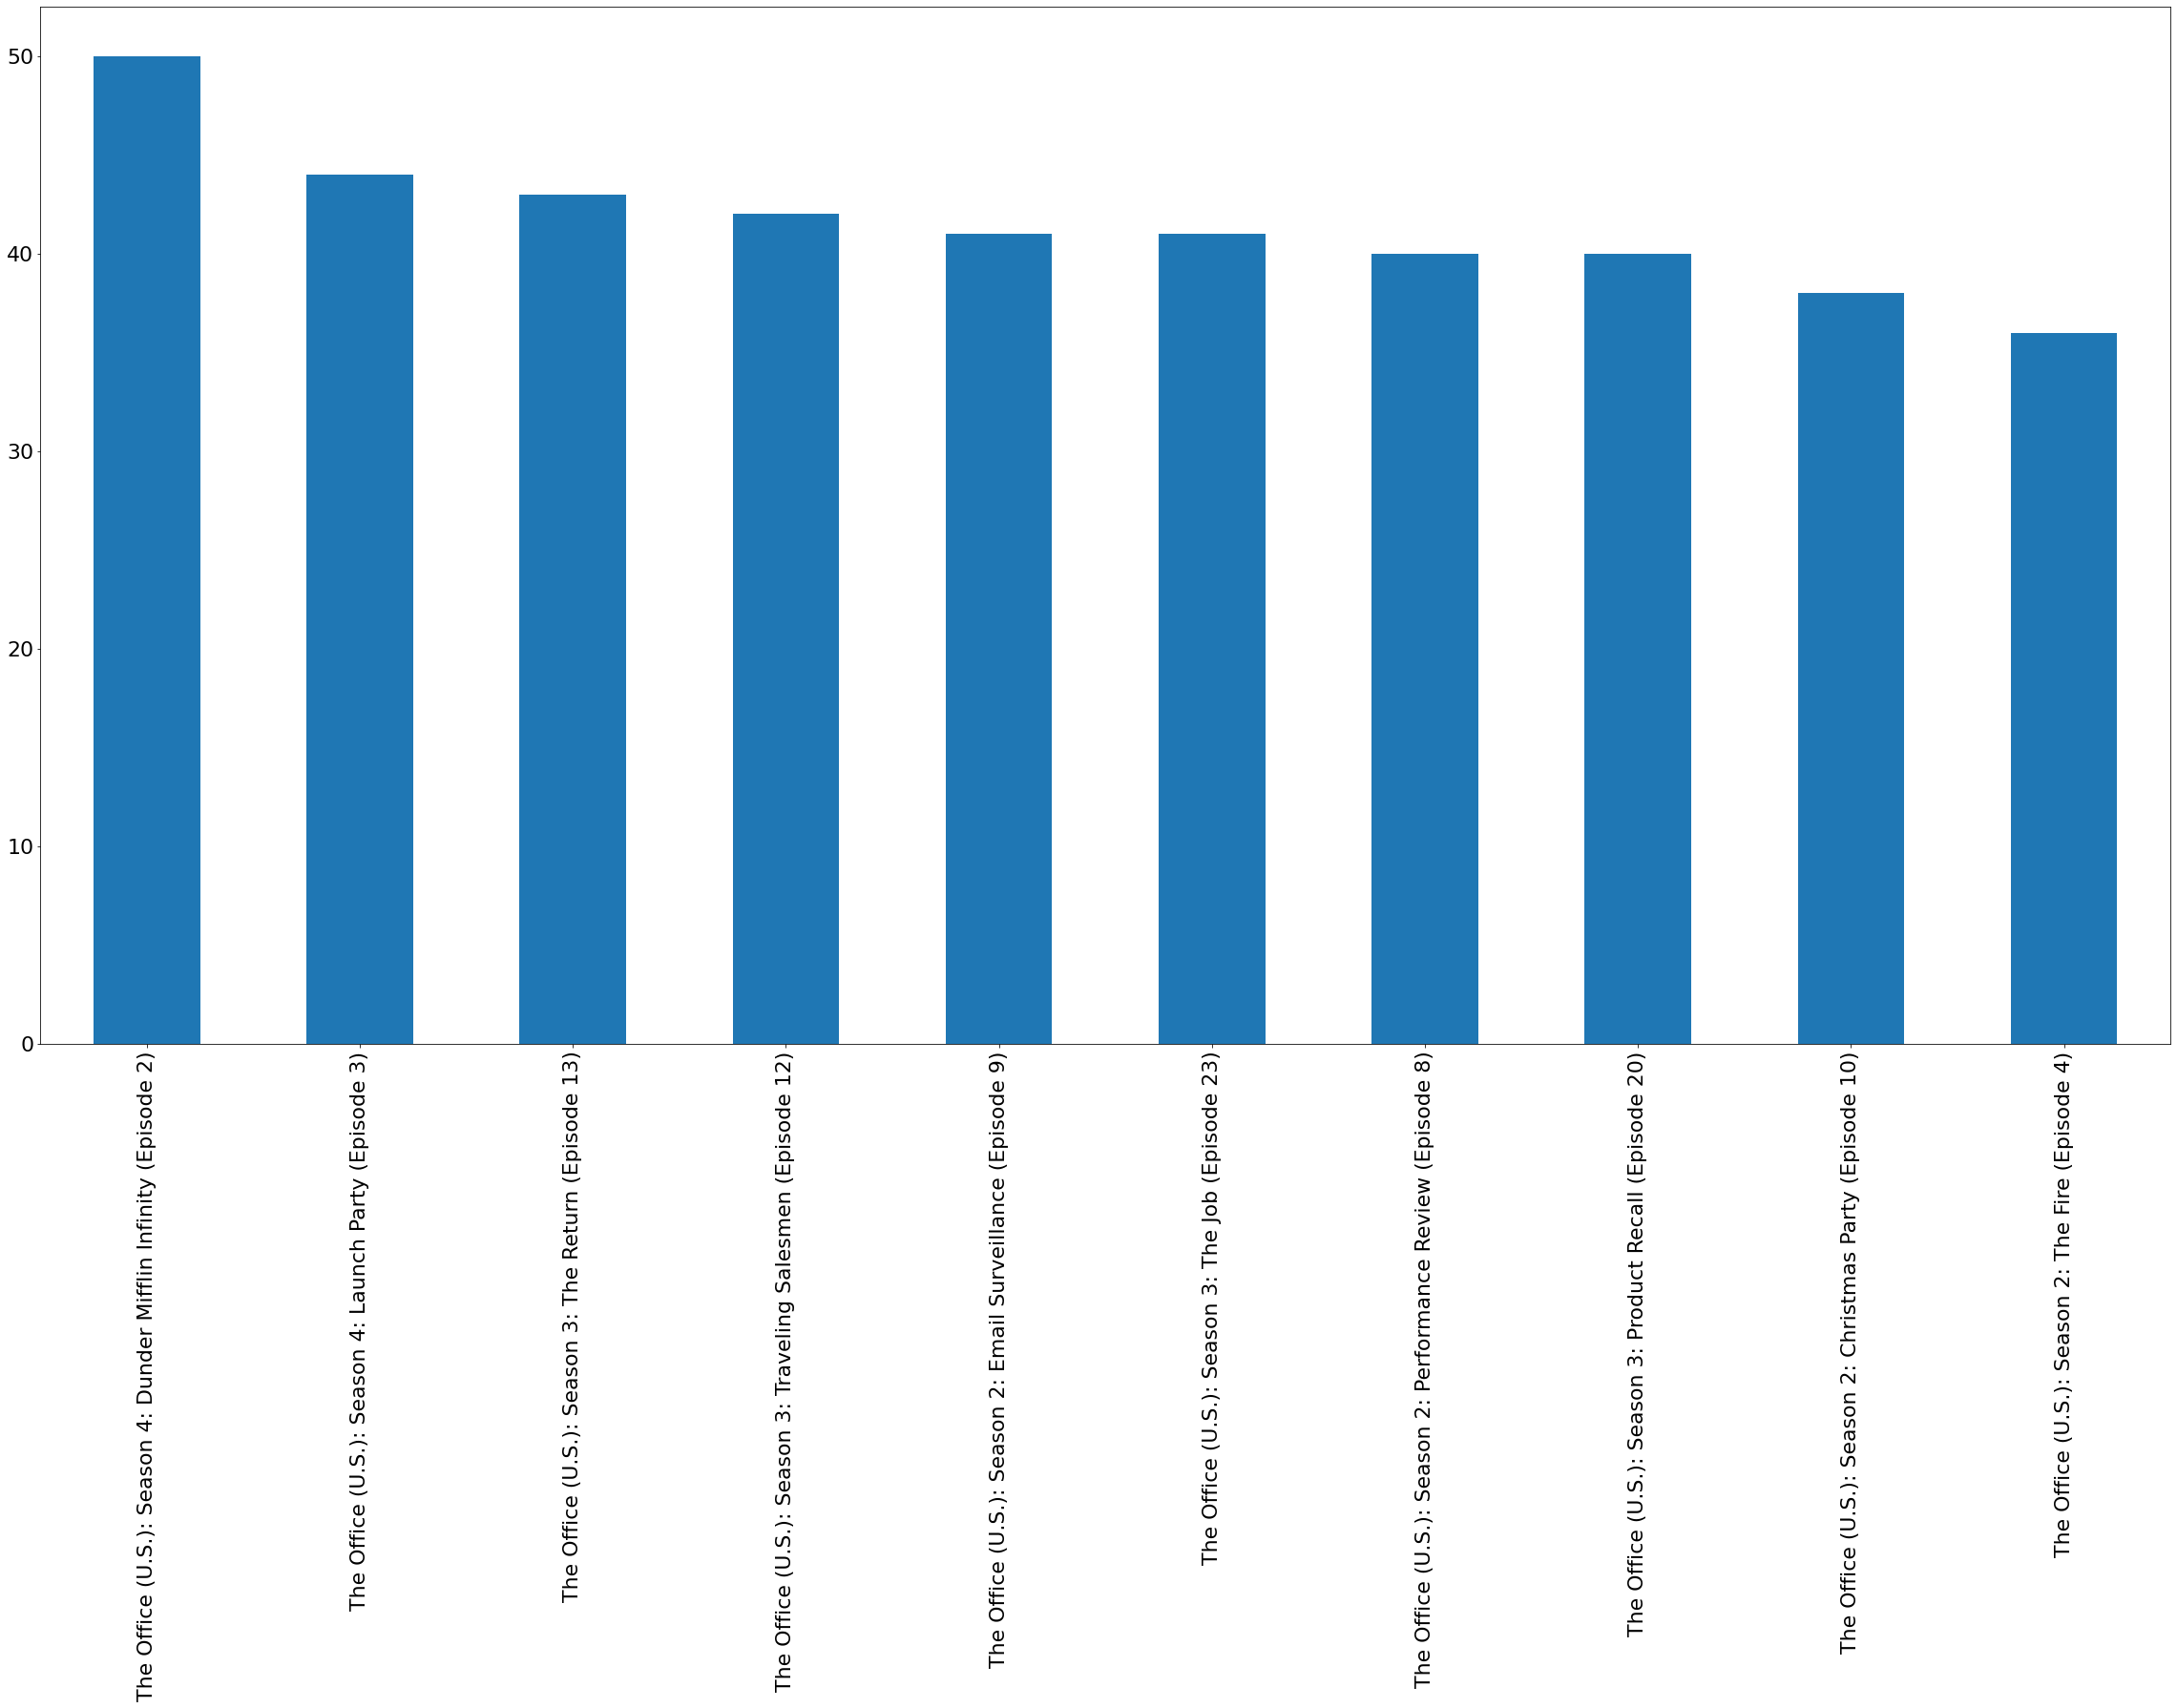

In [34]:
office_dil['Title'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(40,20))

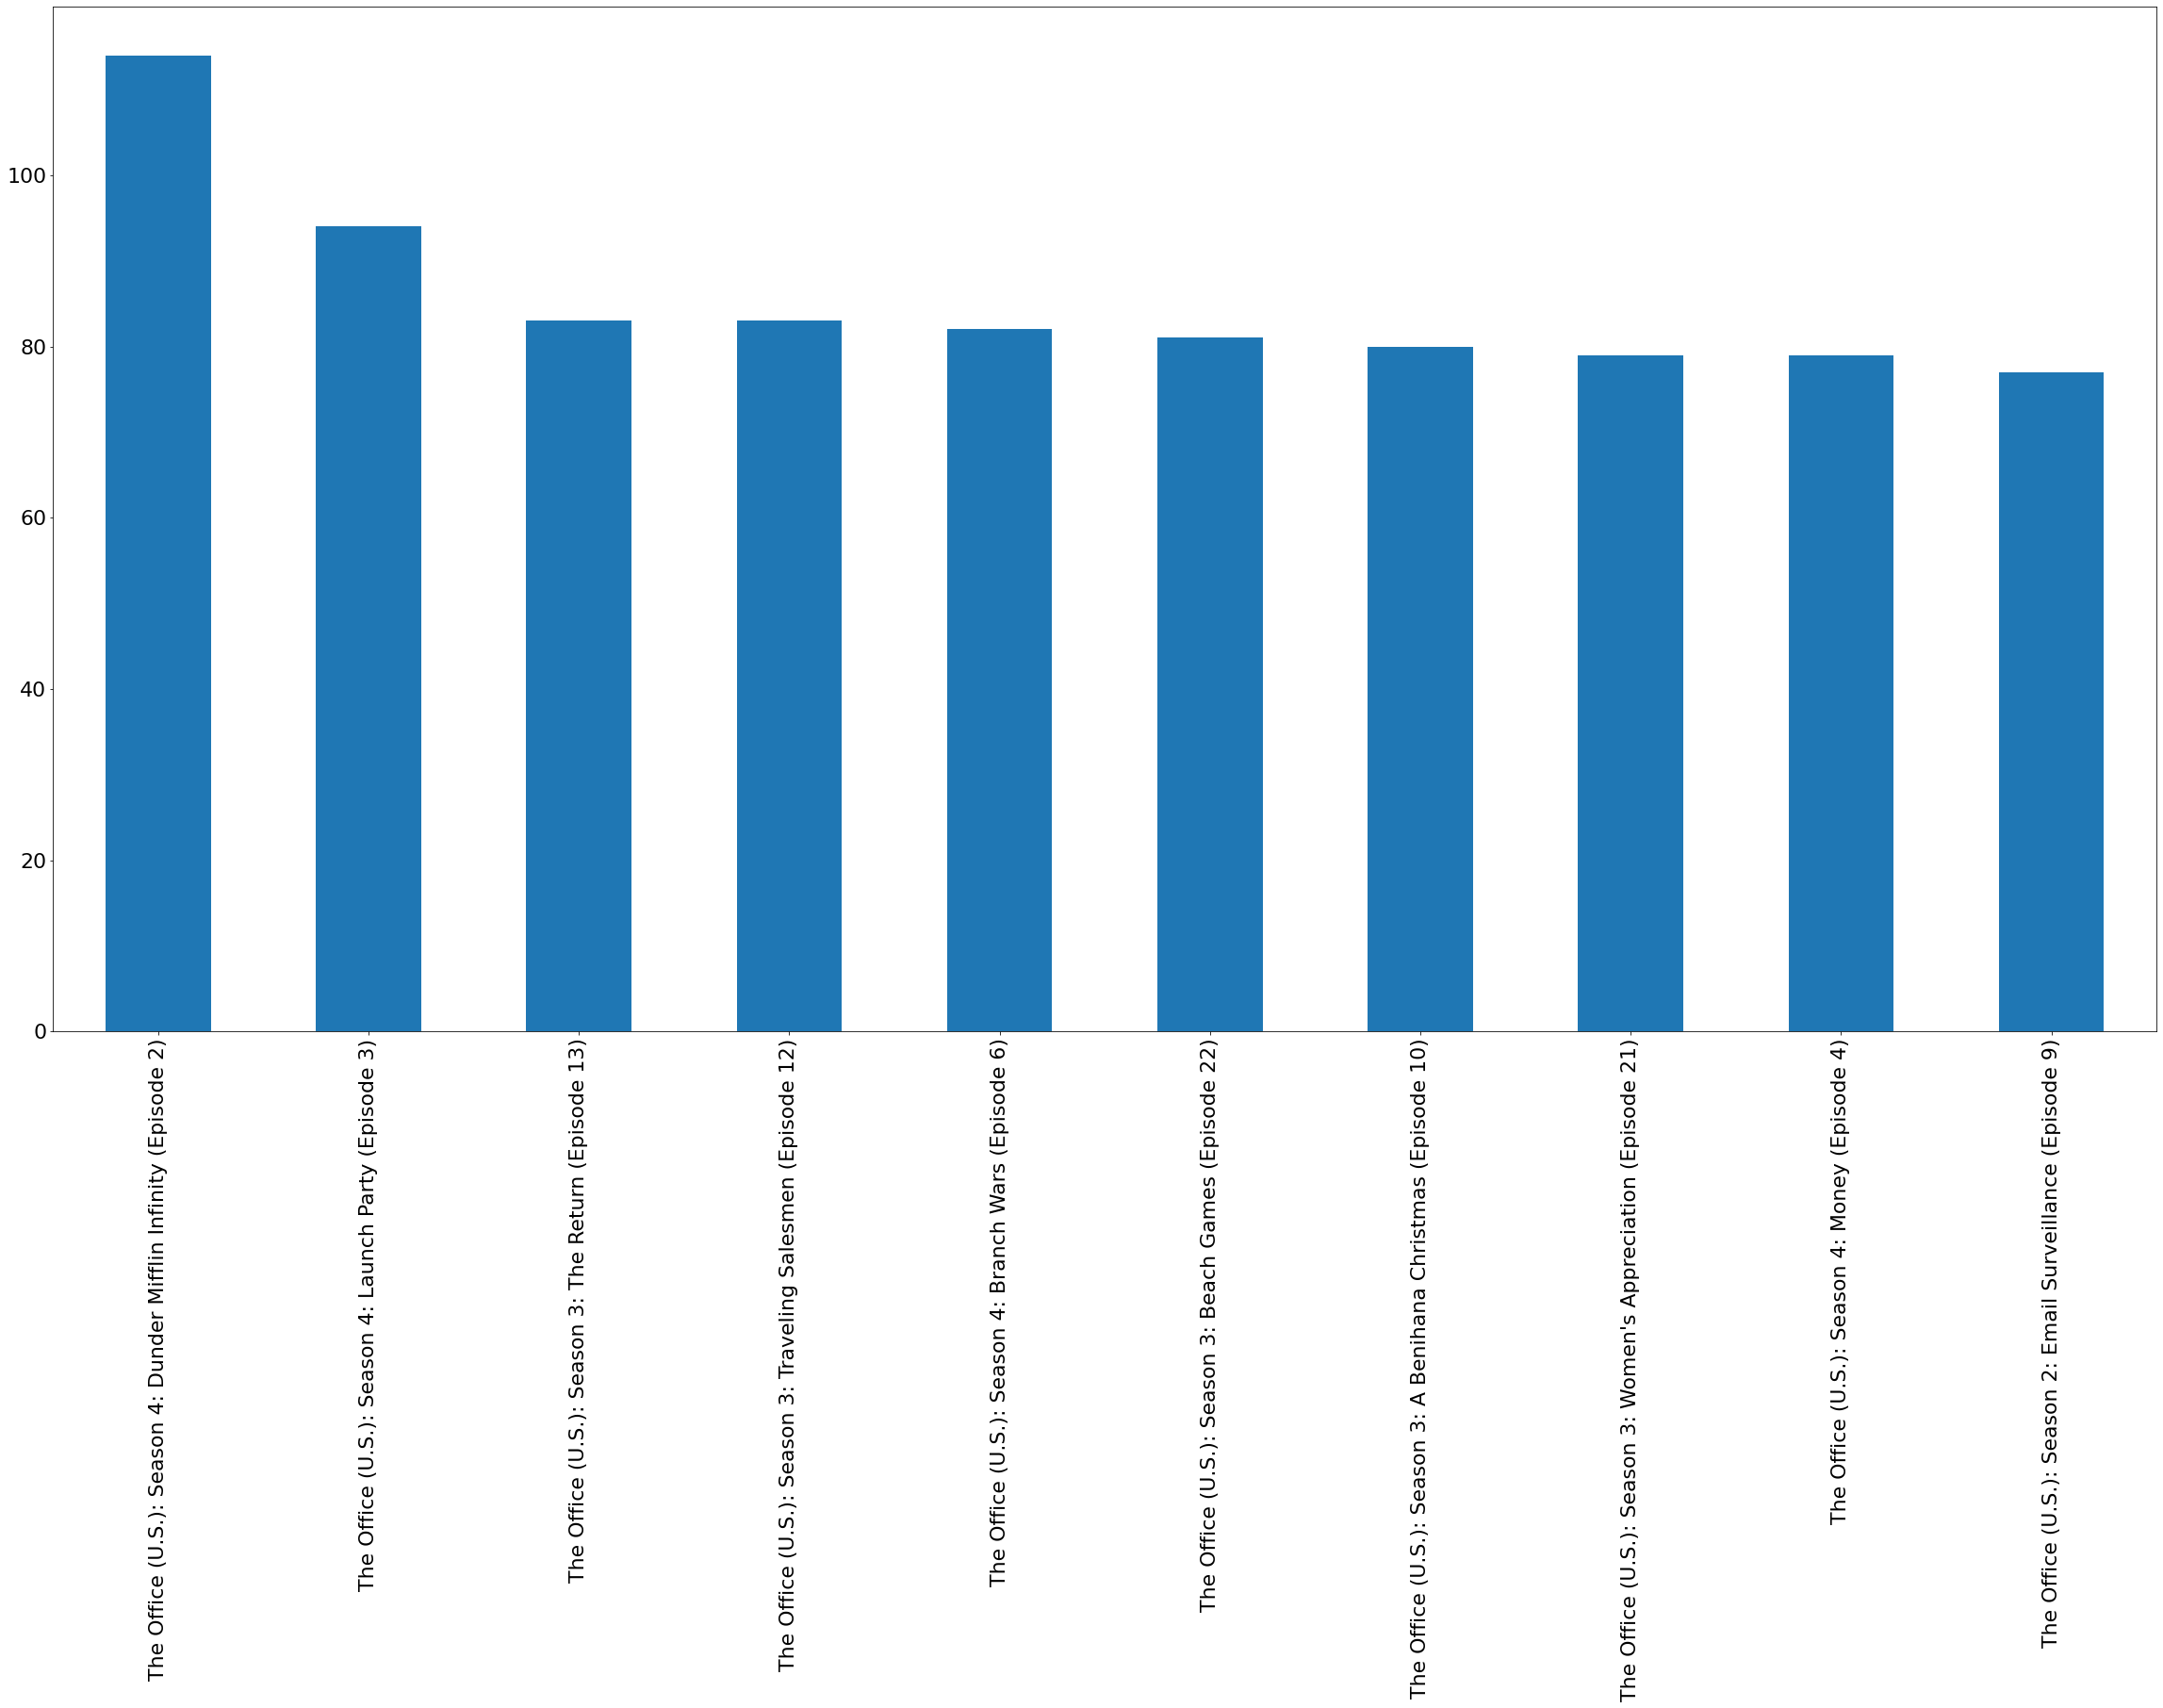

In [35]:
netflix['Title'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(40,20))

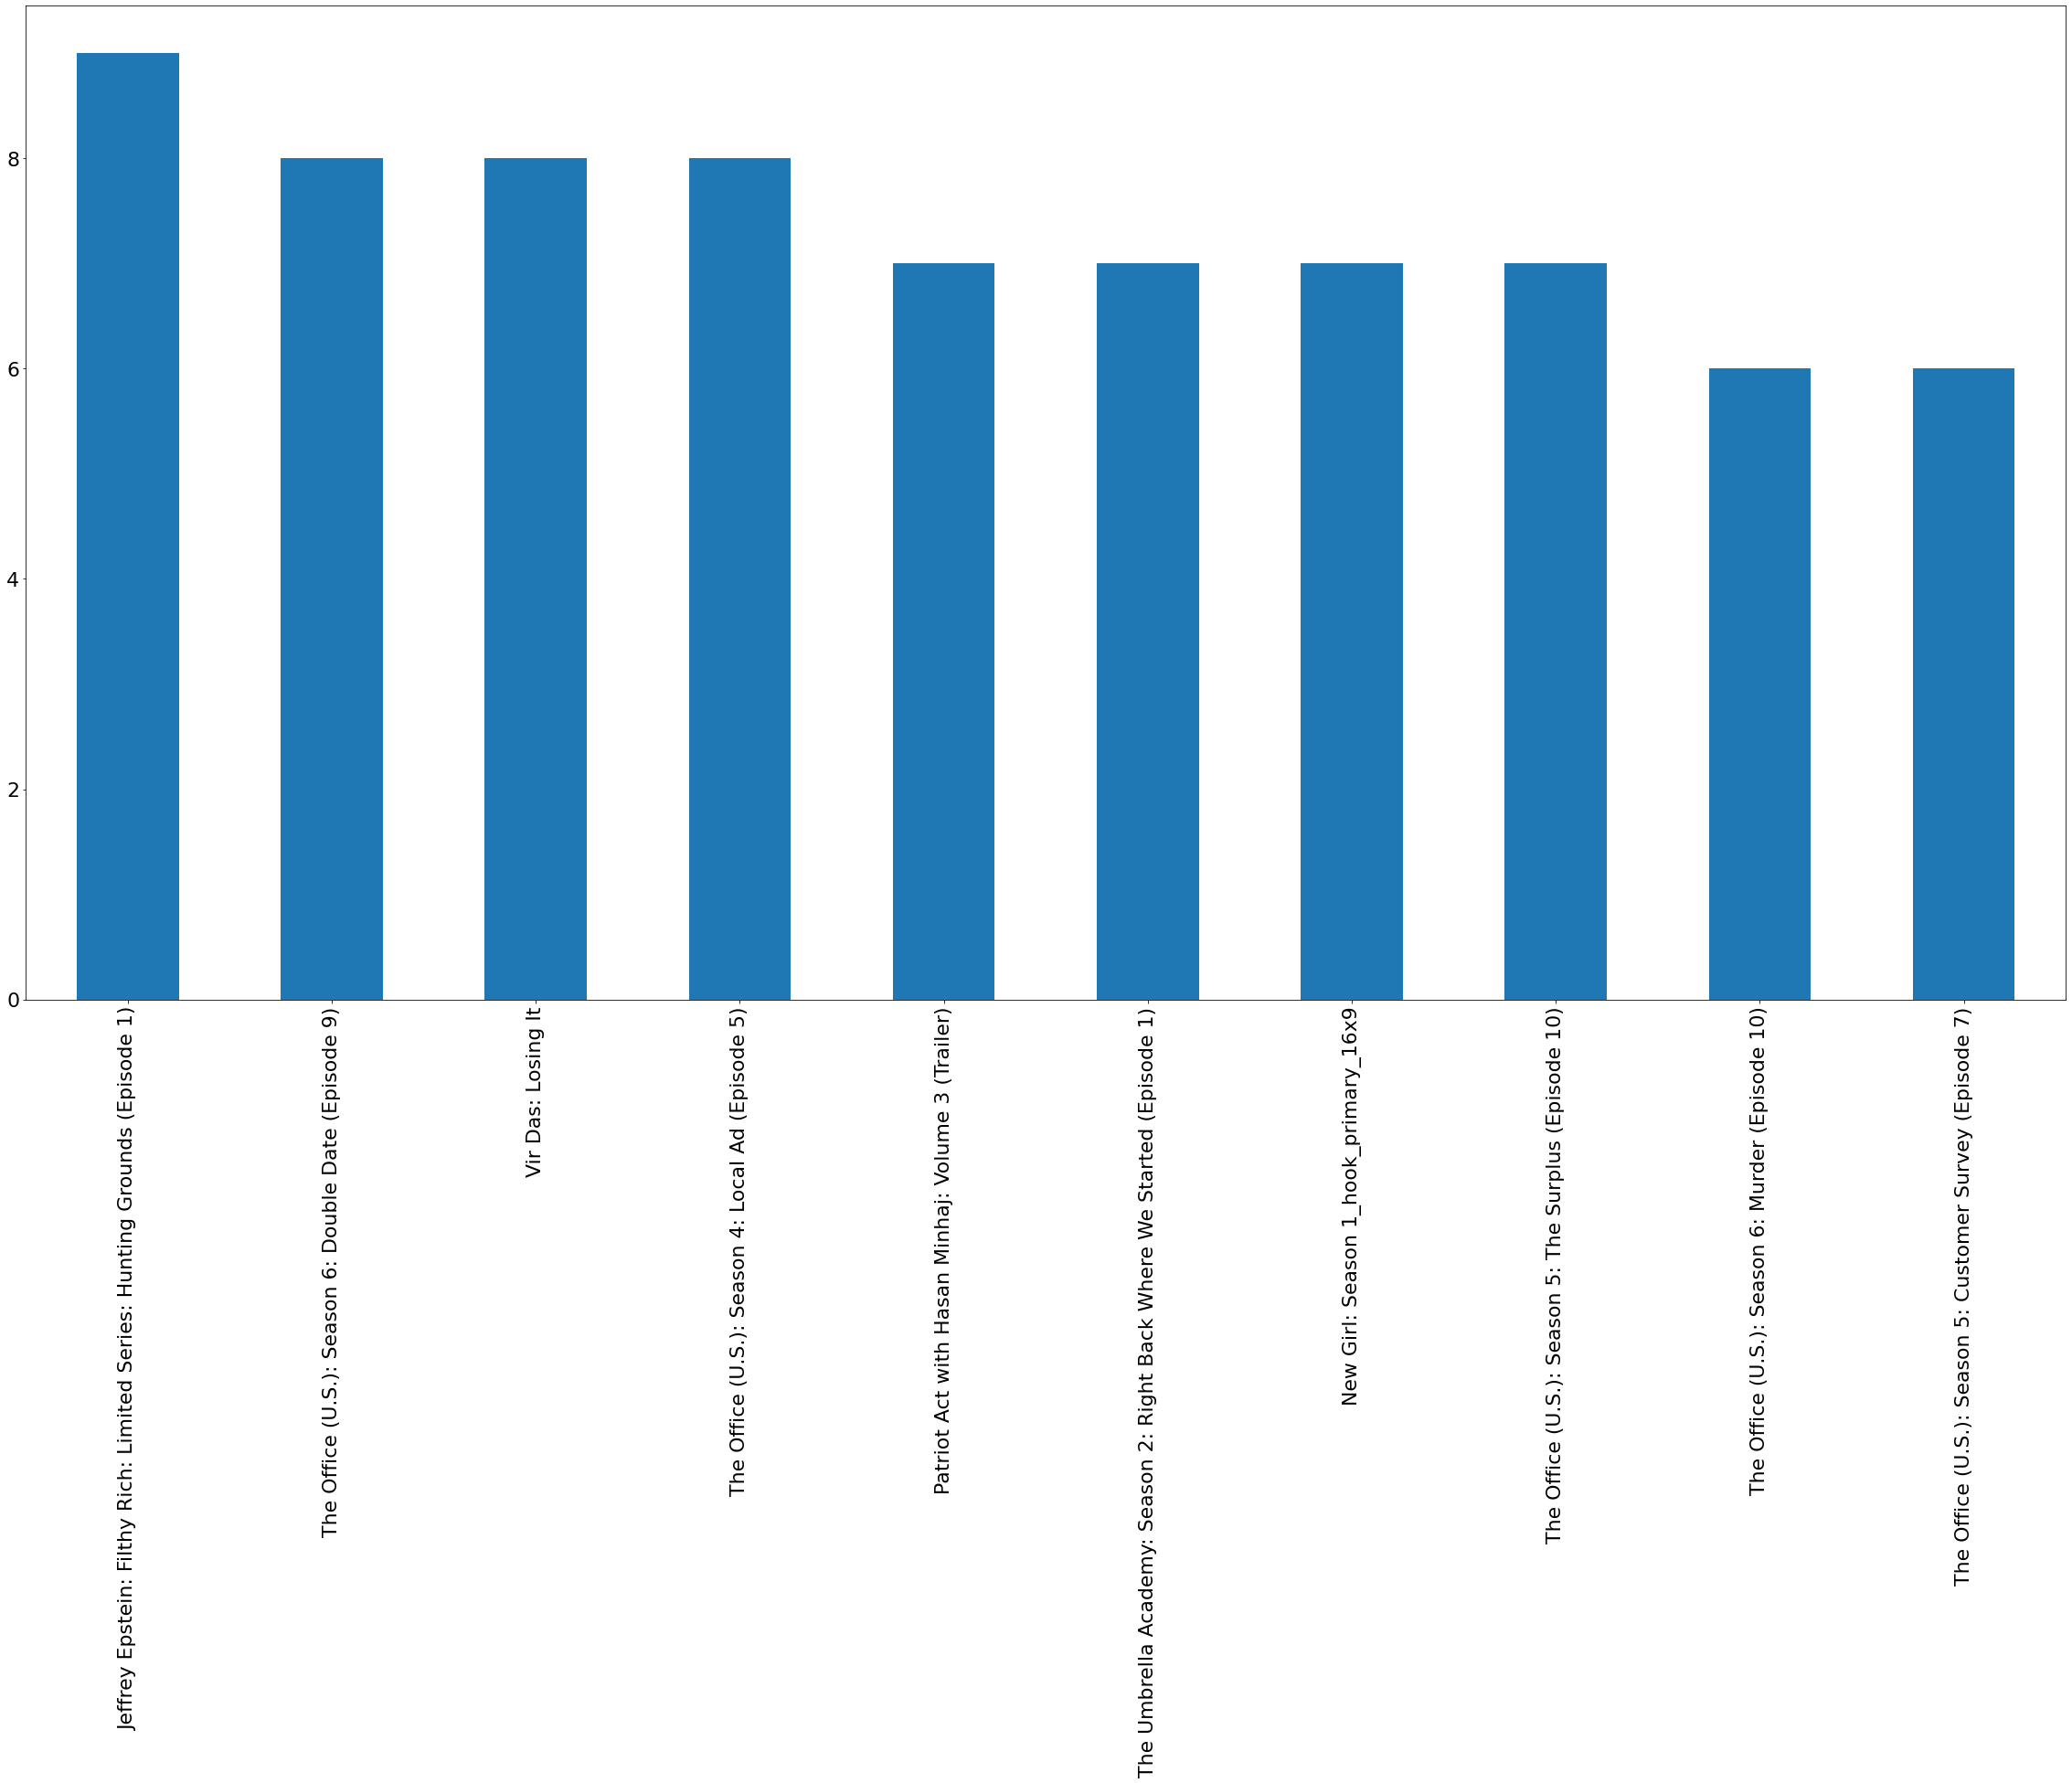

In [36]:
netflix_arzu = netflix[(netflix['Profile Name'] == "Arzu")]

netflix_arzu['Title'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(40,20))

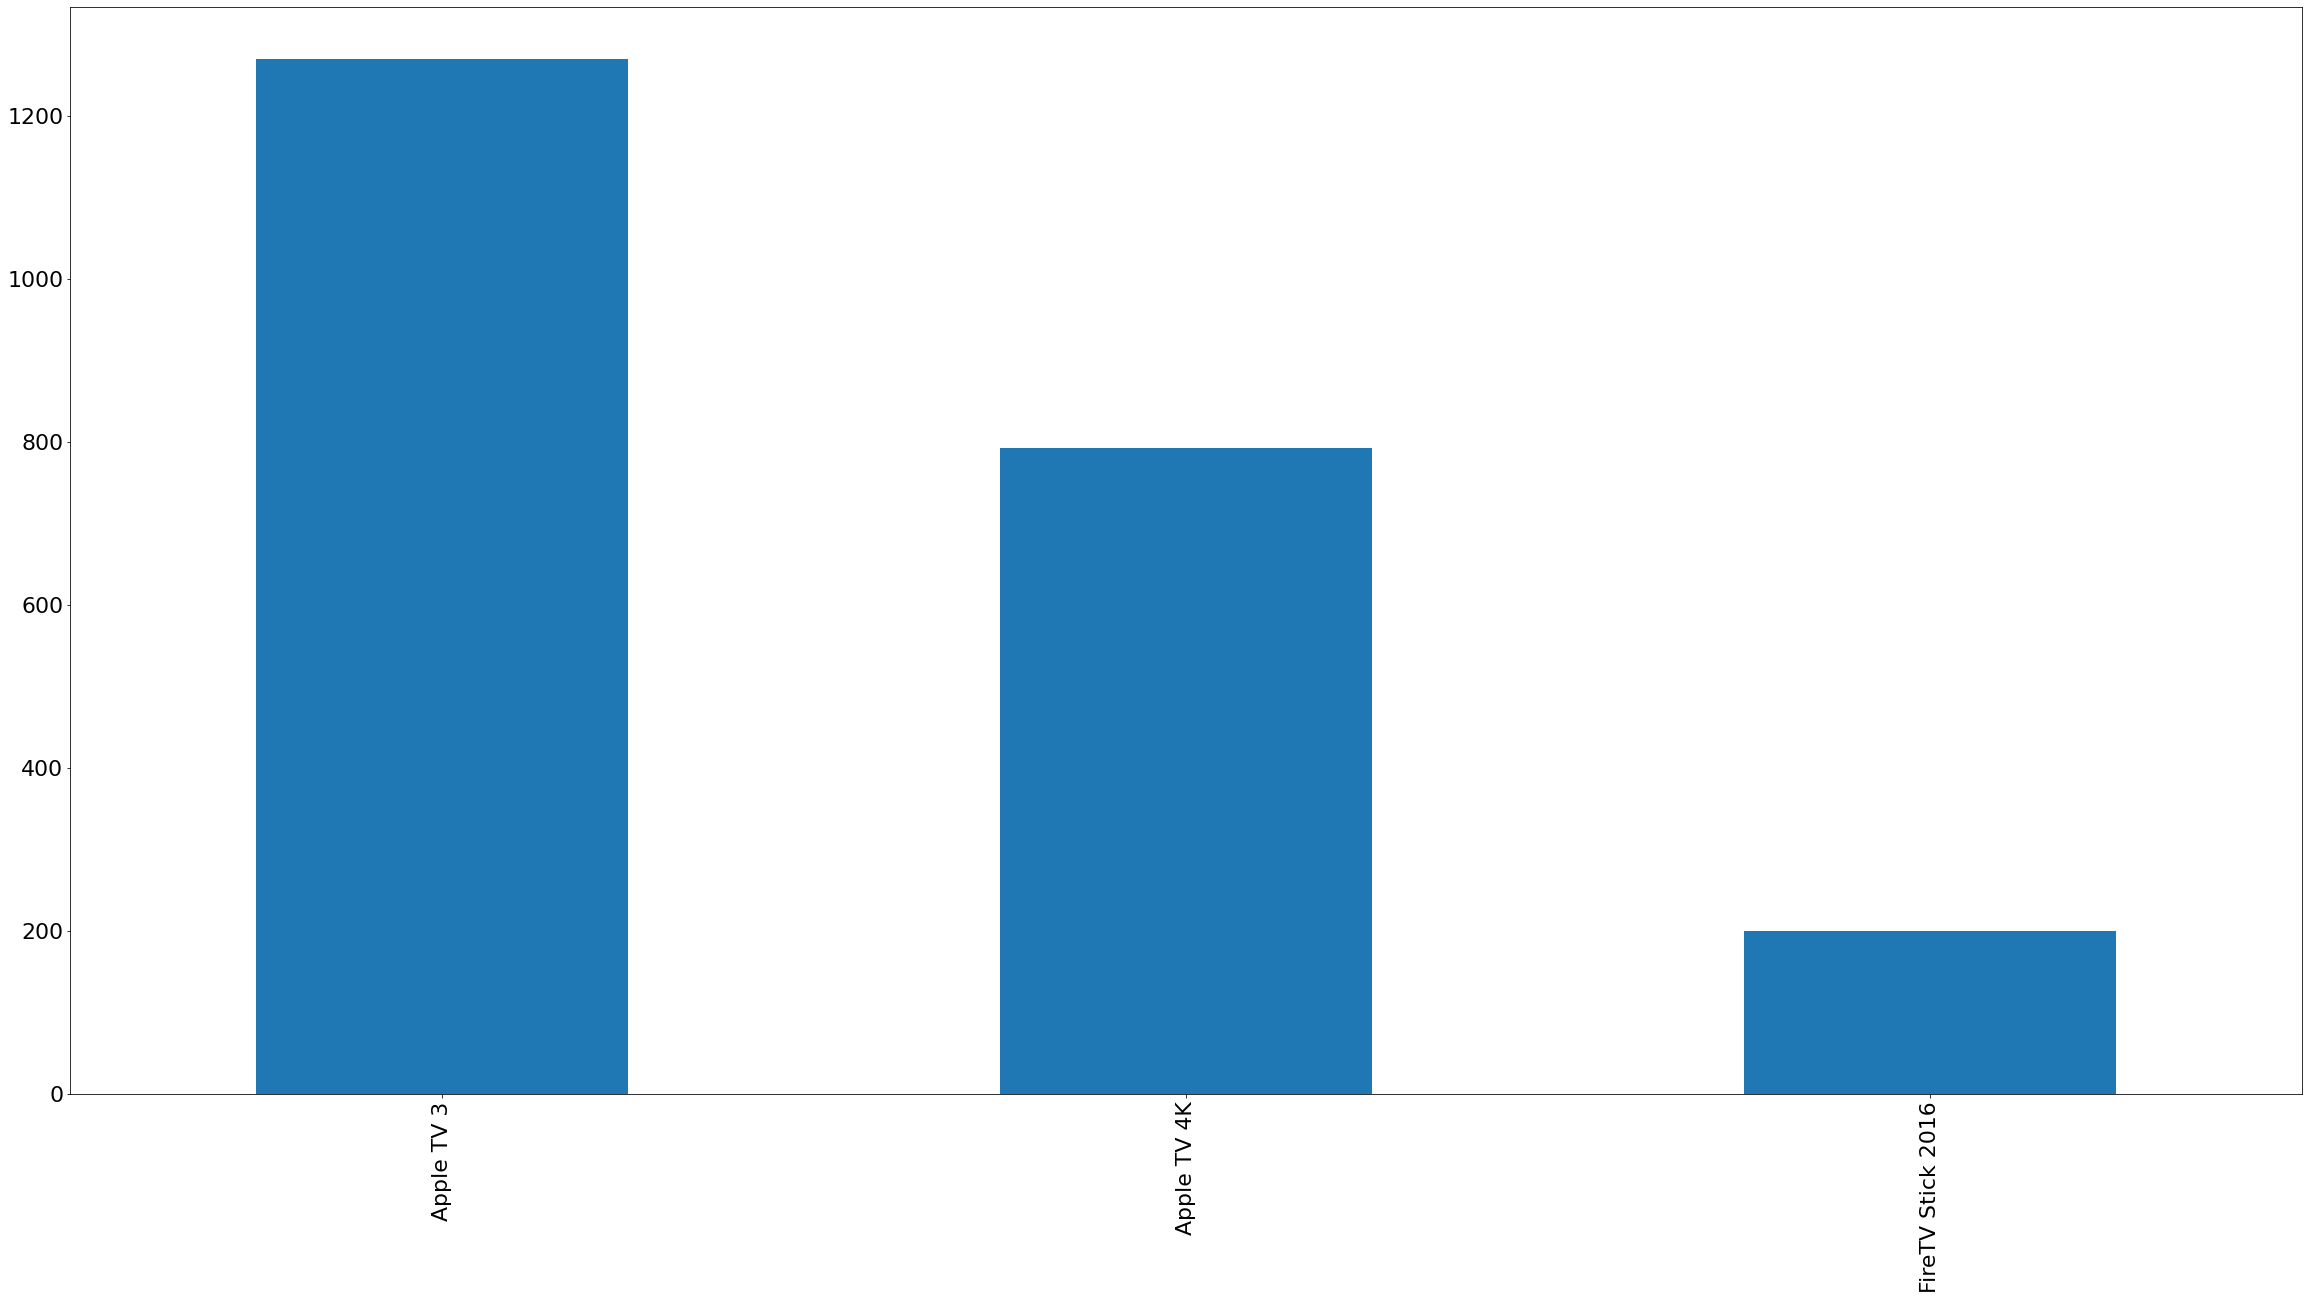

In [37]:
netflix_arzu['Device Type'].value_counts().sort_values(ascending=False).head(3).plot(kind='bar', figsize=(40,20))

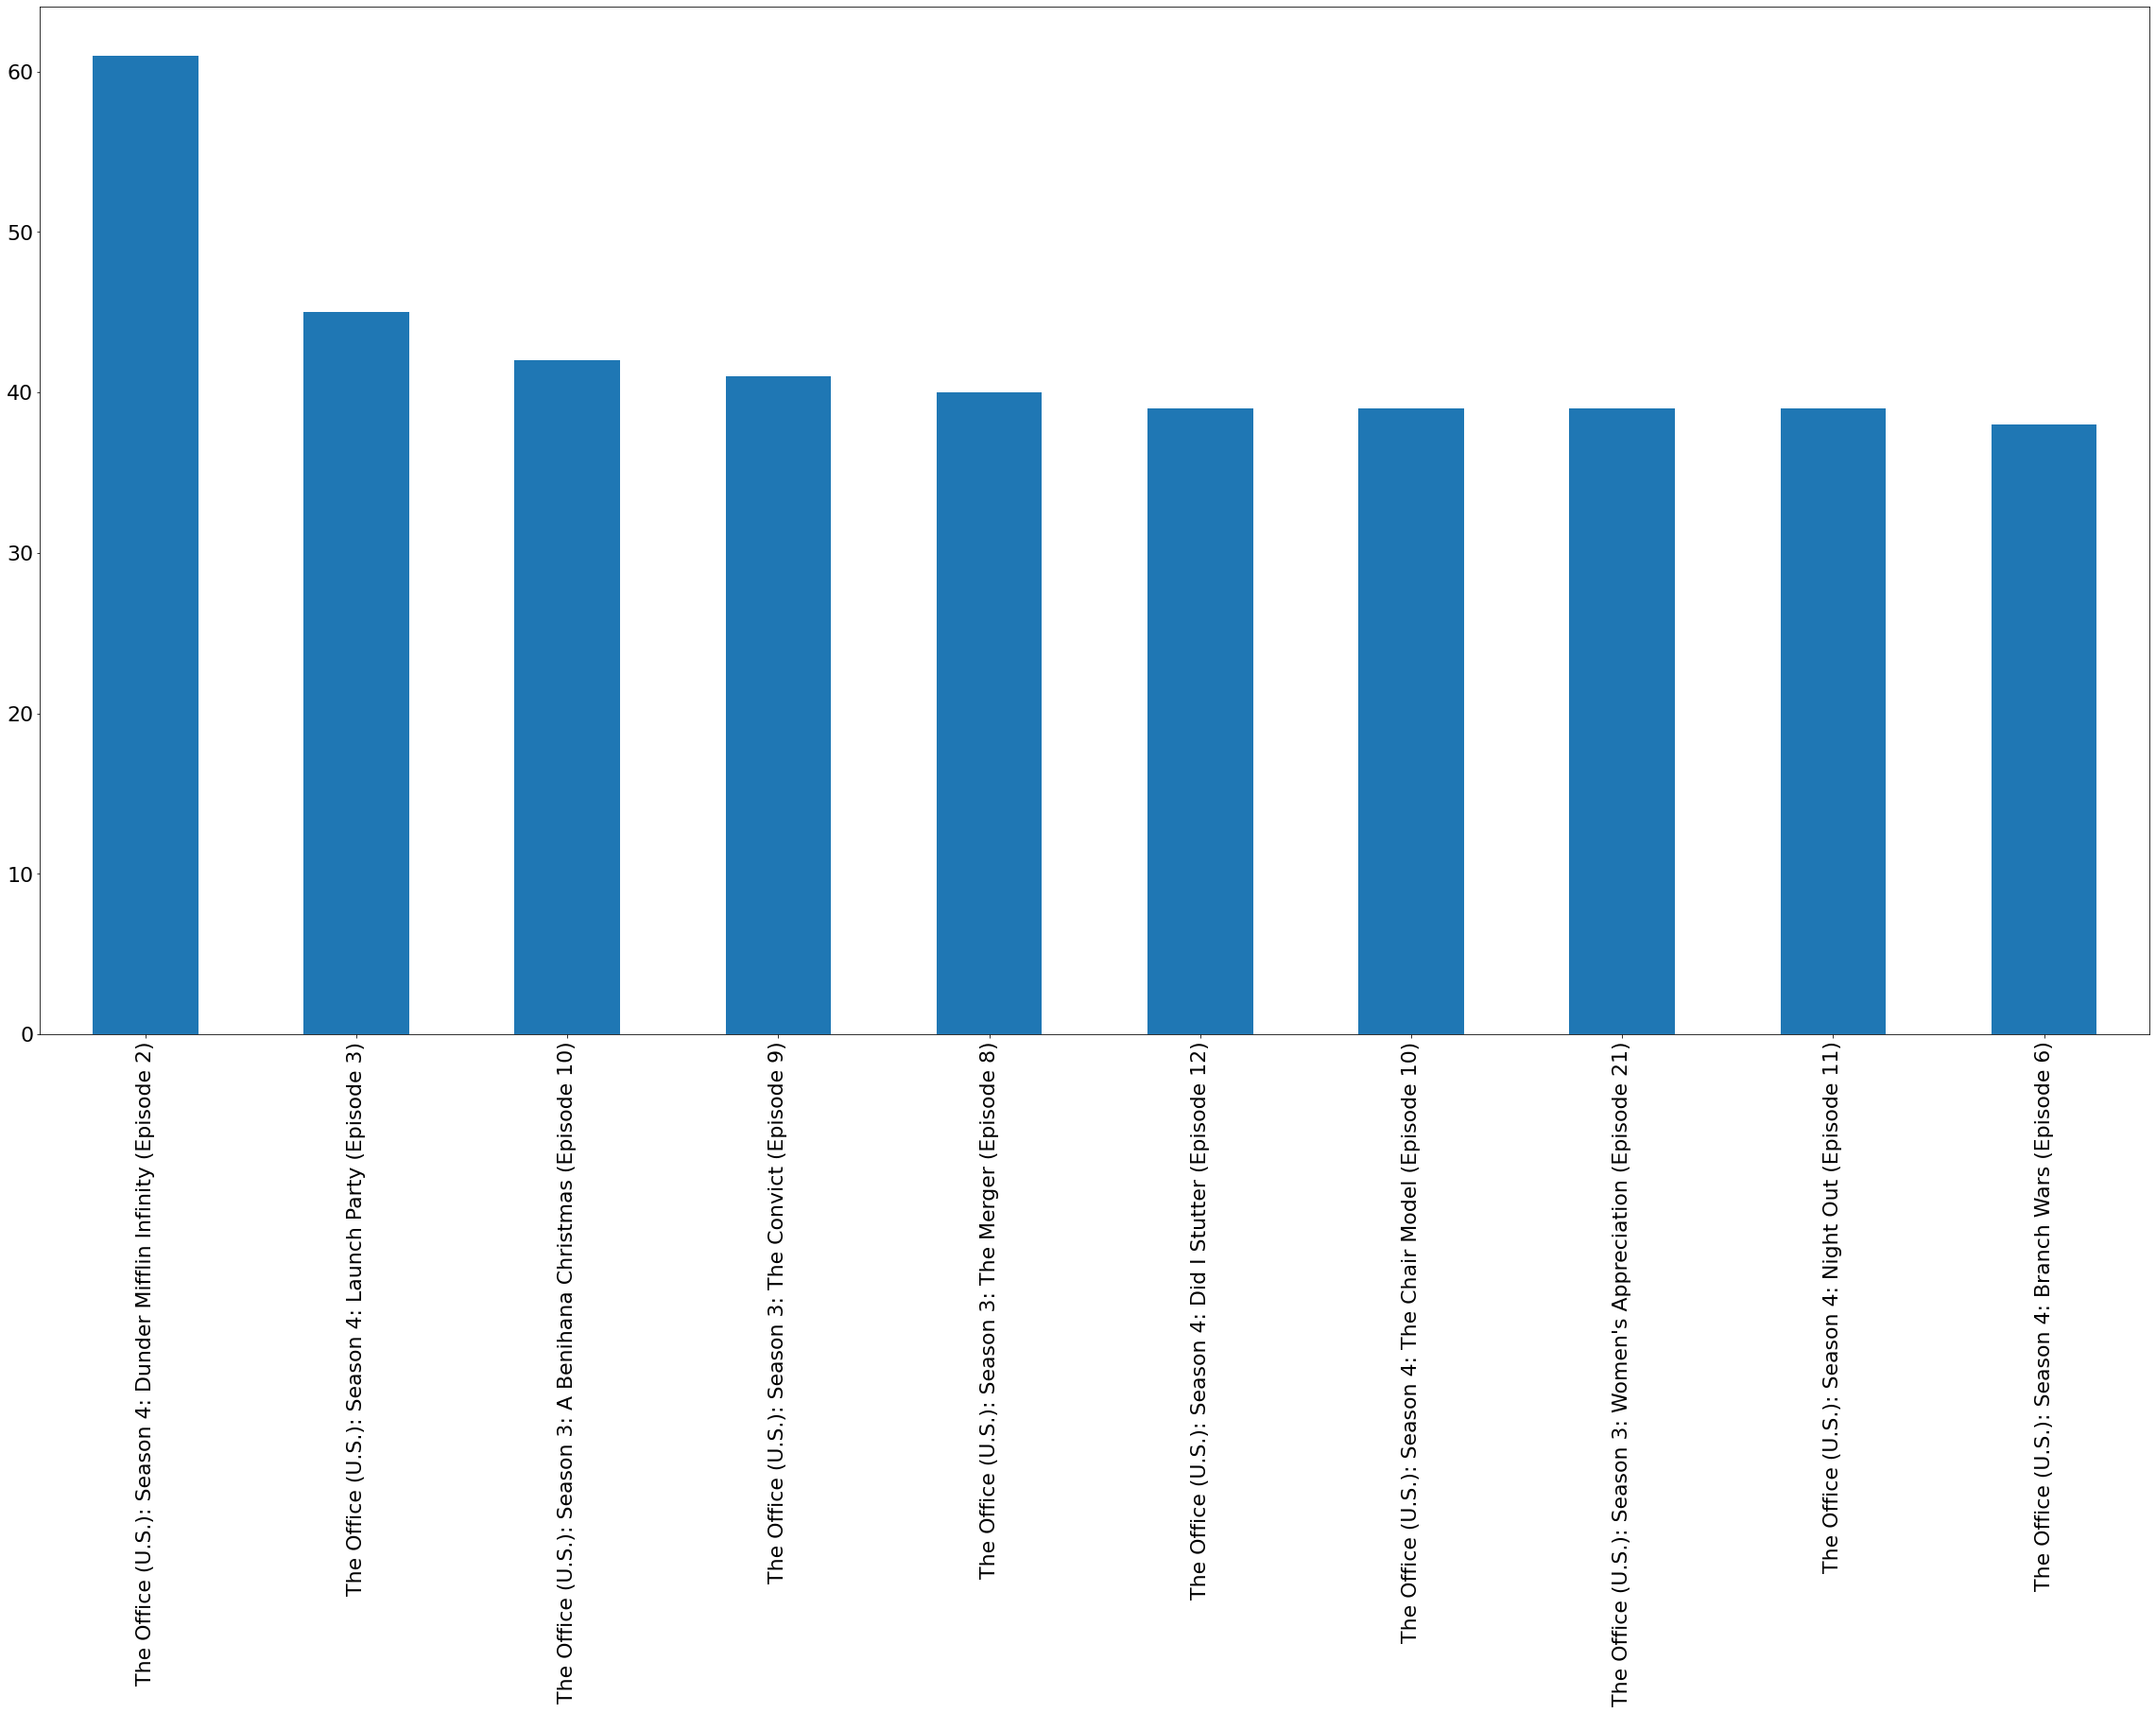

In [38]:
netflix_nil = netflix[(netflix['Profile Name'] == "Anil")]

netflix_nil['Title'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(40,20))

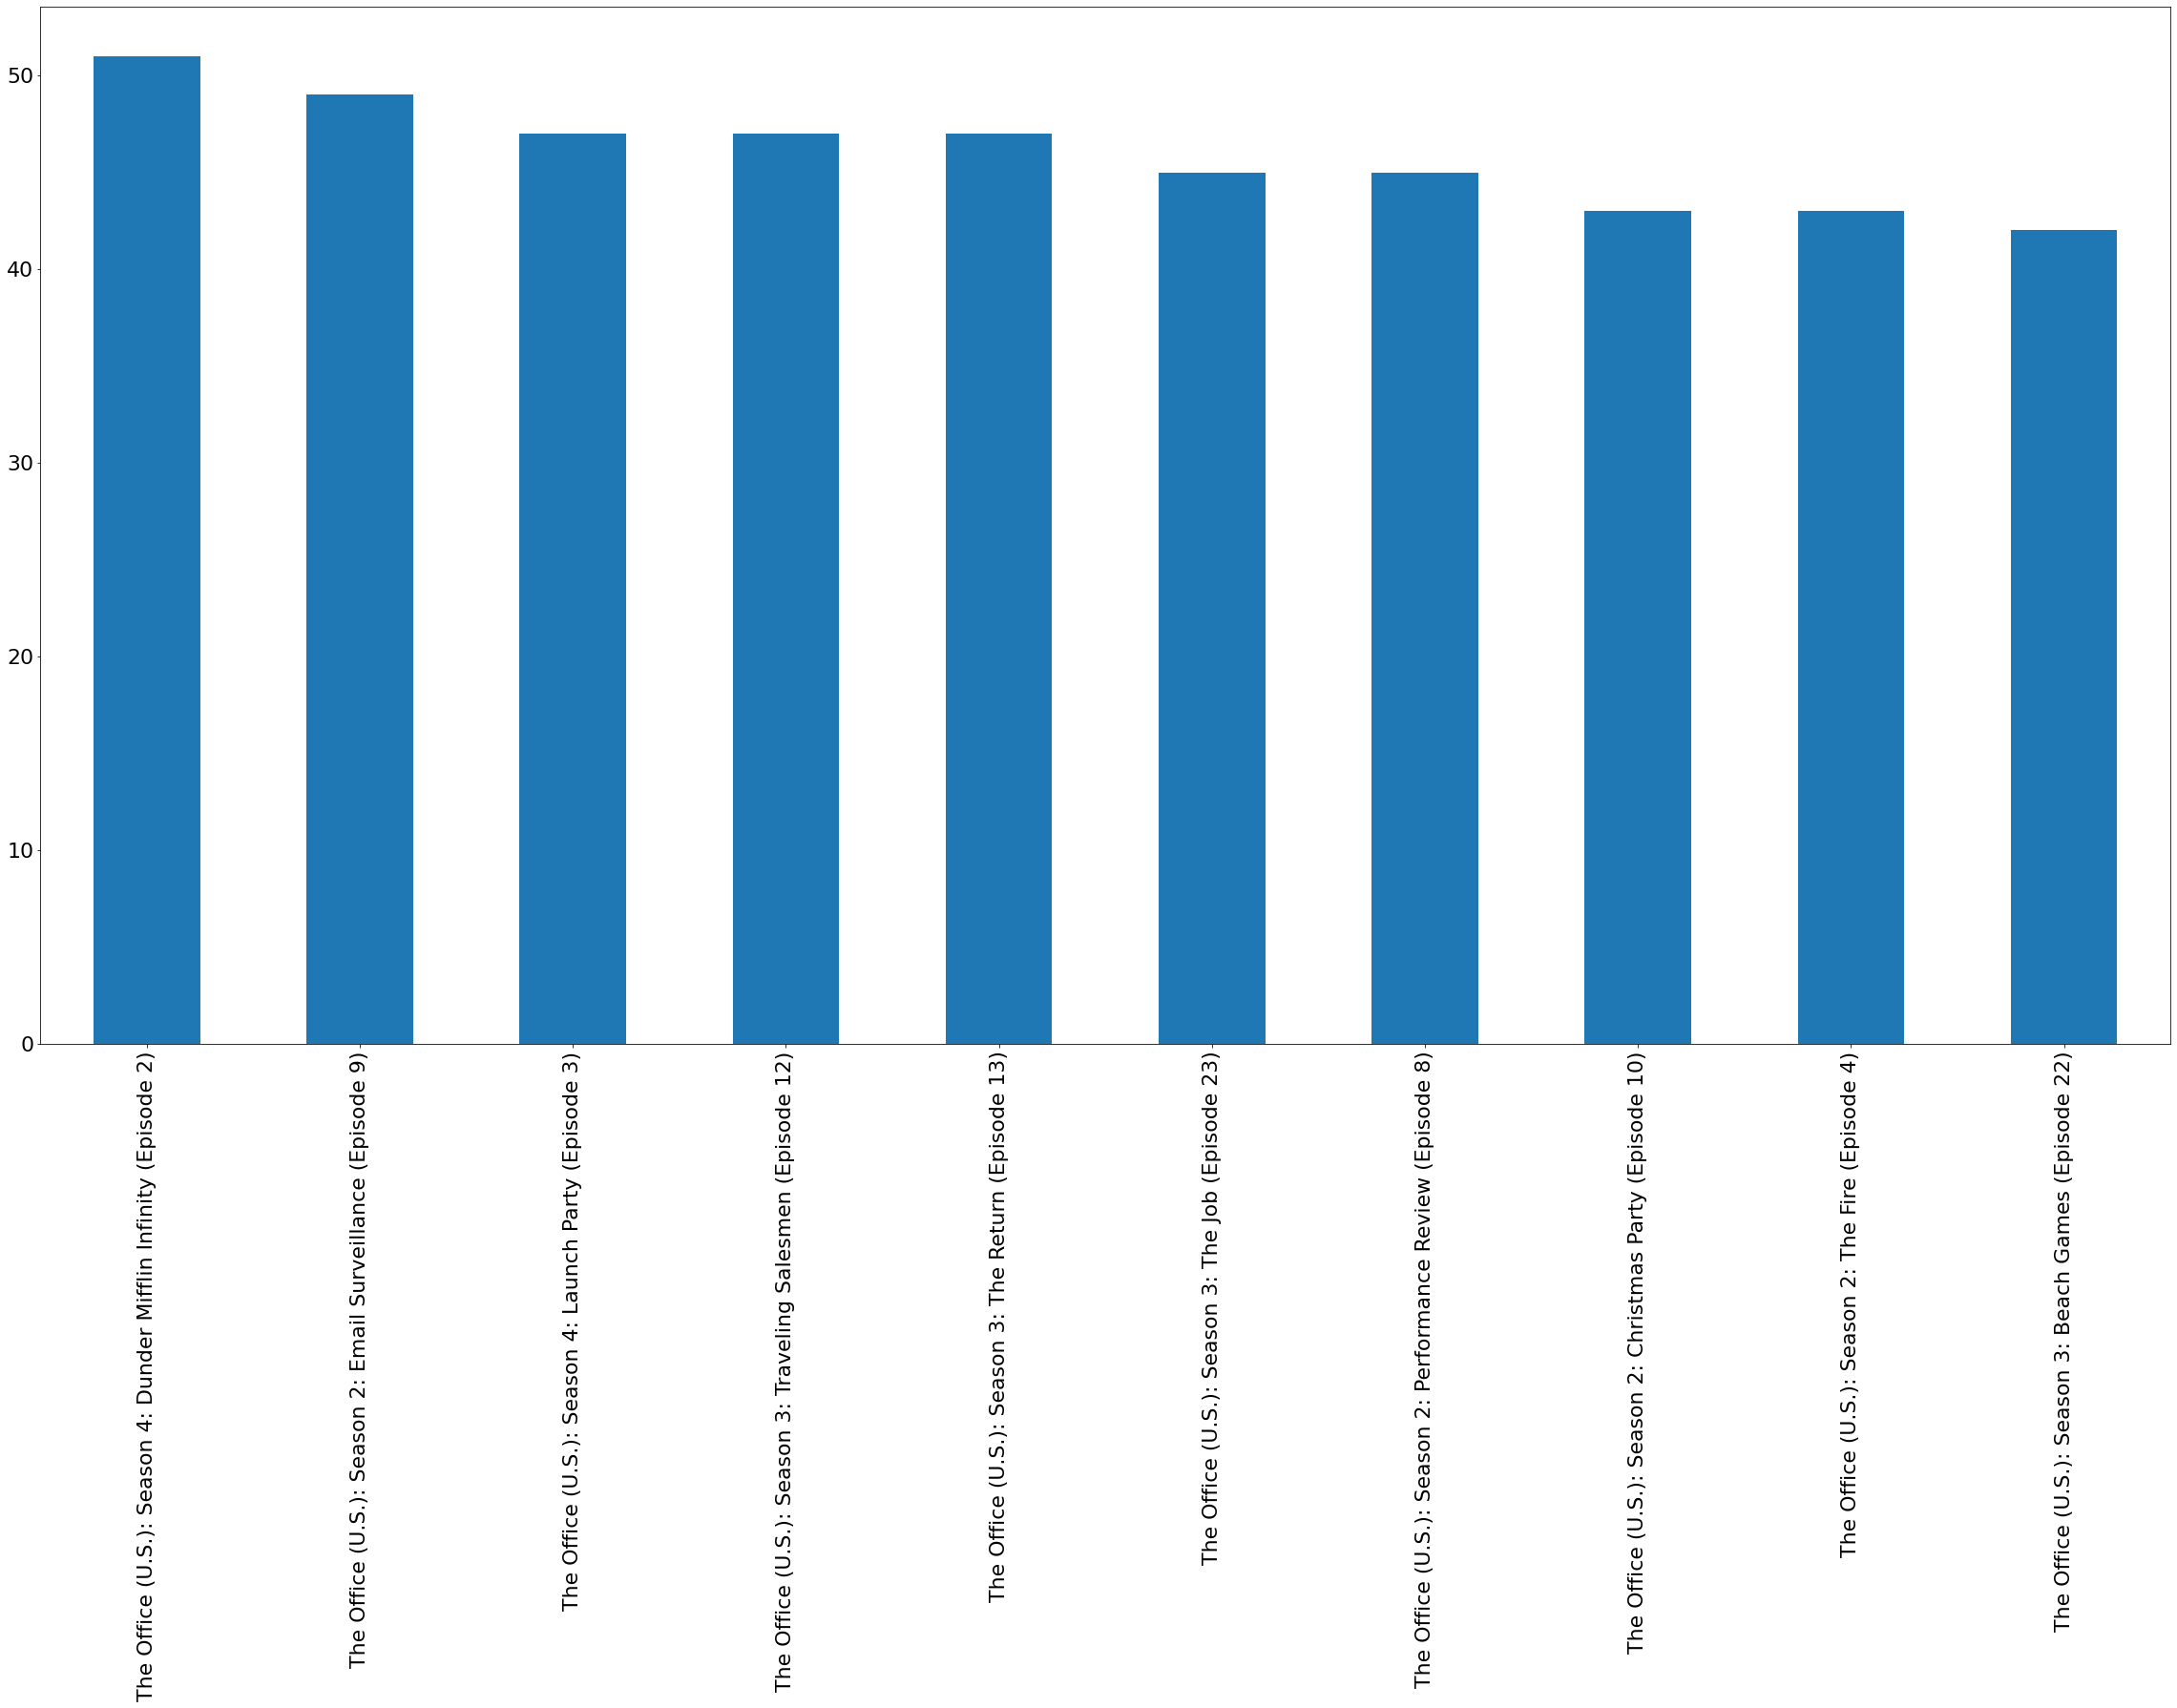

In [39]:
netflix_dil = netflix[(netflix['Profile Name'] == "Adil")]

netflix_dil['Title'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(40,20))

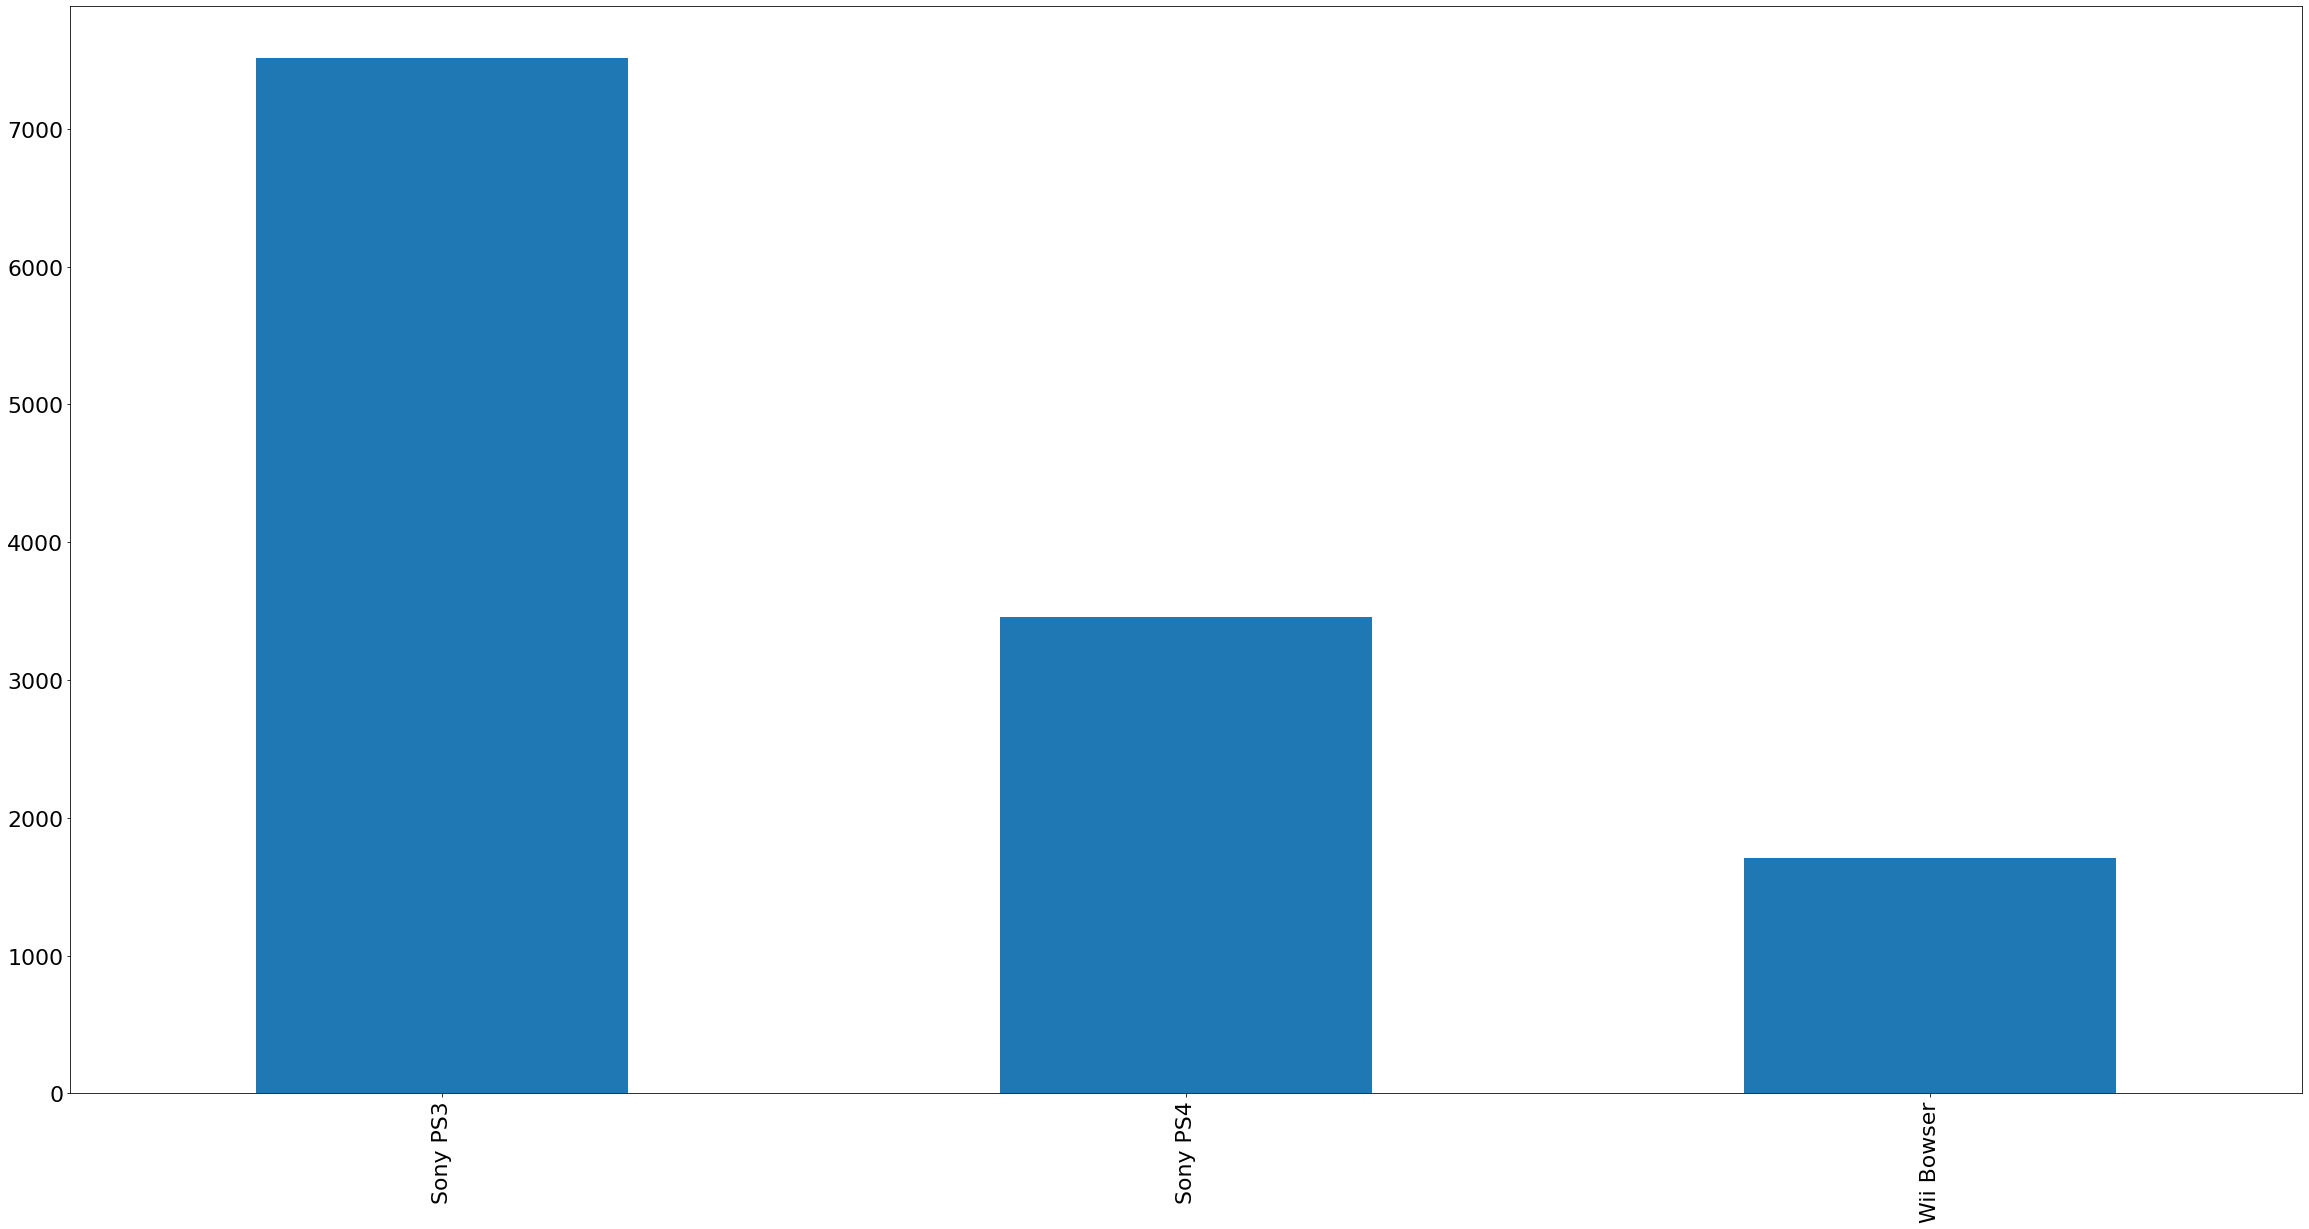

In [40]:
netflix_dil['Device Type'].value_counts().sort_values(ascending=False).head(3).plot(kind='bar', figsize=(40,20))

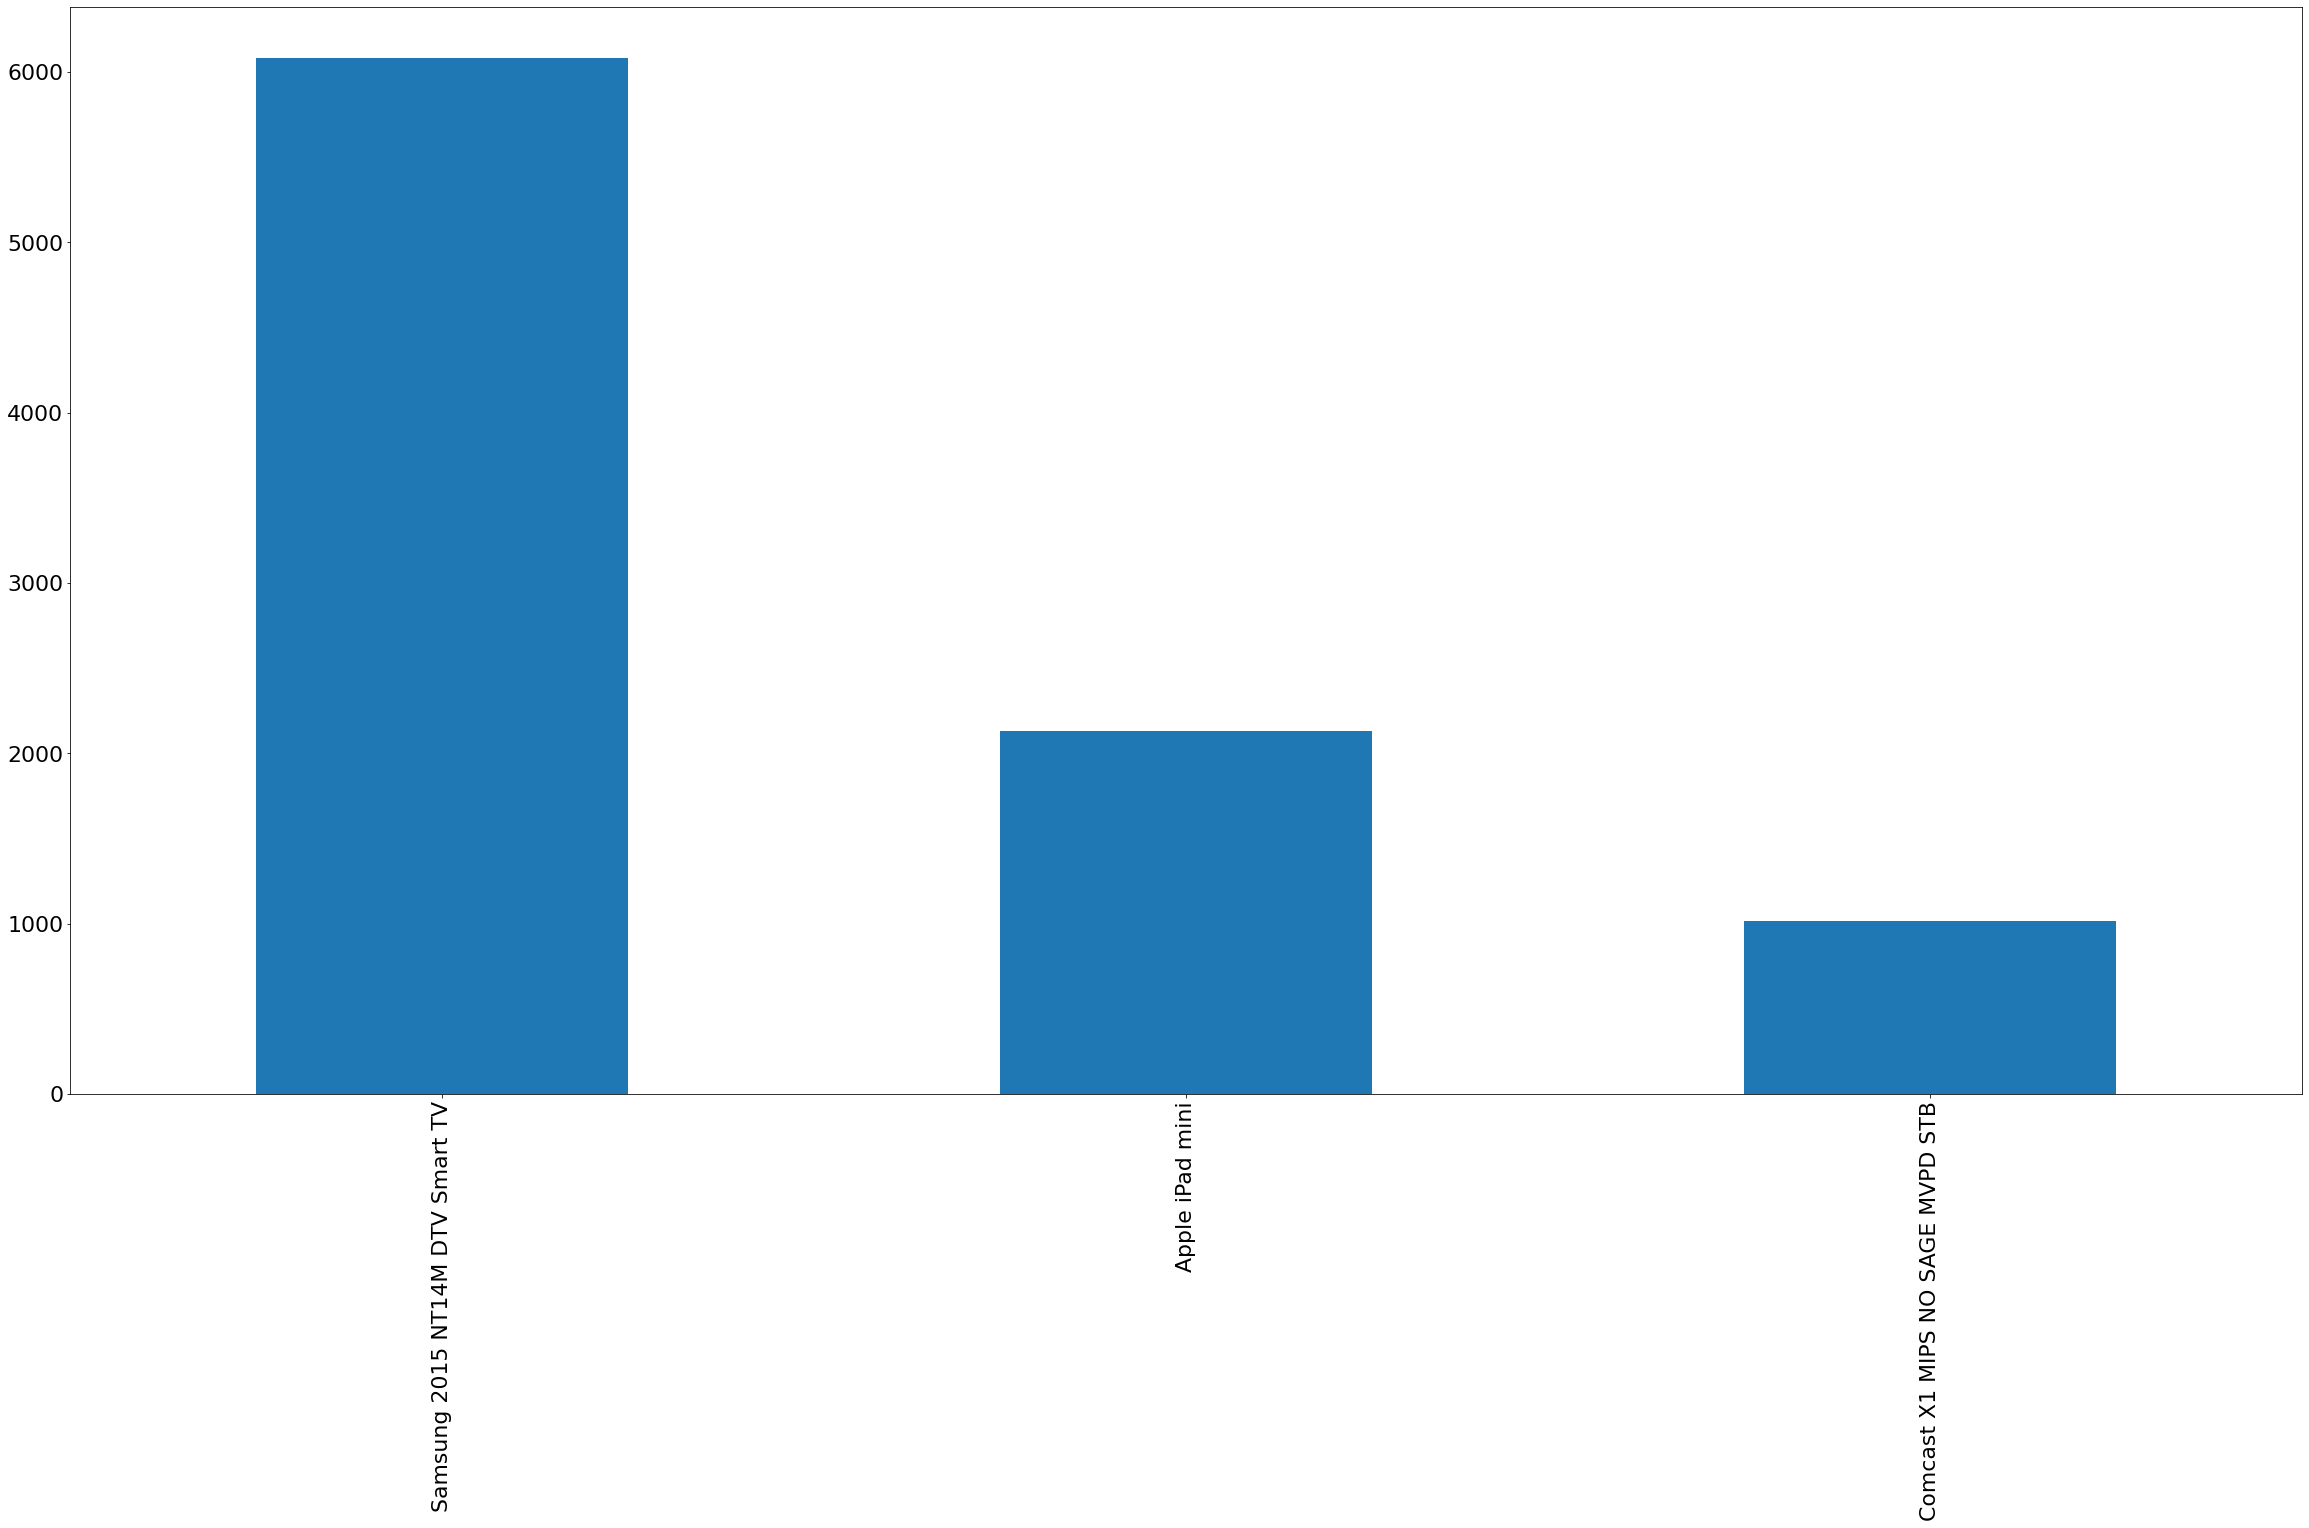

In [41]:
netflix_nil['Device Type'].value_counts().sort_values(ascending=False).head(3).plot(kind='bar', figsize=(40,20))

In [42]:
netflix_nil['Device Type'].value_counts()

Samsung 2015 NT14M DTV Smart TV        6079
Apple iPad mini                        2128
Comcast X1 MIPS NO SAGE MVPD STB       1018
Apple iPhone 7 (CDMA)                   487
Netflix Chrome MAC (Cadmium) HTML 5     329
Sony PS3                                175
FireTV Stick 2016                       138
Apple iPhone X (CDMA)                    47
Sony PS4                                  7
FireTV Stick 2014                         7
Chrome PC (Cadmium)                       5
PC                                        2
Name: Device Type, dtype: int64

In [43]:
netflix_dil['Device Type'].value_counts()

Sony PS3                                7514
Sony PS4                                3460
Wii Bowser                              1712
Mac                                      419
Google Chromecast V5 Streaming Stick     275
PC                                       203
Apple iPhone X (CDMA)                    134
Netflix Chrome MAC (Cadmium) HTML 5       51
Microsoft Xbox 360                        40
iPad Air Cellular                         36
Google Chromecast V3 Streaming Stick      15
Apple iPad mini                           12
HD Version                                 8
Apple iPad 2 WiFi                          4
Safari MAC (Cadmium)                       4
Comcast X1 MIPS NO SAGE MVPD STB           3
Apple iPhone 4S                            2
Chrome PC (Cadmium)                        1
Name: Device Type, dtype: int64

In [44]:
netflix_arzu['Device Type'].value_counts()

Apple TV 3                             1270
Apple TV 4K                             792
FireTV Stick 2016                       200
Apple iPhone X (CDMA)                   107
Netflix Chrome MAC (Cadmium) HTML 5      91
iPad Air 2 WiFi                          86
Safari MAC (Cadmium)                     52
Samsung 2015 NT14M DTV Smart TV          37
Wii Bowser                               31
Chrome PC (Cadmium)                      12
Apple iPad mini                          11
Apple iPhone 6                            7
Comcast X1 MIPS NO SAGE MVPD STB          1
Name: Device Type, dtype: int64